<a href="https://colab.research.google.com/github/AbhishekAeera/Forecasting-Tidal-Power-Generation-Through-Significant-Wave-Height-and-Mean-Wave-Period-Analysis/blob/main/Final_Project_SWH_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Time Series Analysis**

In [ ]:
# Load the Excel file
file_path = '/content/drive/MyDrive/Time Series Forecasting/wave_operational_tidal_current_data_2023.xlsx'
xls = pd.ExcelFile(file_path)

# List all sheet names to understand the structure of the file
xls.sheet_names

['Sheet1']

In [ ]:
# Let's read the data from 'Sheet1' and inspect the first few rows to understand its structure
df = pd.read_excel(xls, sheet_name='Sheet1')
df.head()

valid_time   SWH (m)   MWP (s)  MWD (degrees)  WMB (m)  \
0 2023-01-01 00:00:00  0.913489  6.199628     297.024841       78   
1 2023-01-01 01:00:00  0.926315  6.168501     299.492218       78   
2 2023-01-01 02:00:00  0.935679  6.160366     301.271240       78   
3 2023-01-01 03:00:00  0.941087  6.194872     301.798584       78   
4 2023-01-01 04:00:00  0.940675  6.262677     301.215576       78   

   Wave Length (m)  Wave Velocity (m/s)     SST (K)  Wind Speed (m/s)  \
0        60.009552             9.679541  301.426514          5.513513   
1        59.408478             9.630942  301.426514          5.414176   
2        59.251892             9.618242  301.426514          5.267598   
3        59.917515             9.672115  301.426514          4.961535   
4        61.236340             9.777981  301.426514          4.381107   

   Wind Direction (degrees)  Current Velocity (m/s)  Tide (m)  
0                285.310822                0.106924  0.705500  
1                280.778931                0.111127  0.565833  
2                276.447266                0.115497  0.314000  
3                273.530640                0.120191 -0.018833  
4                271.498596                0.123542 -0.376667

In [ ]:
df['valid_time'] = pd.to_datetime(df['valid_time'])
df.set_index('valid_time', inplace=True)

# Ensure the data is sorted by date
df = df.sort_index()

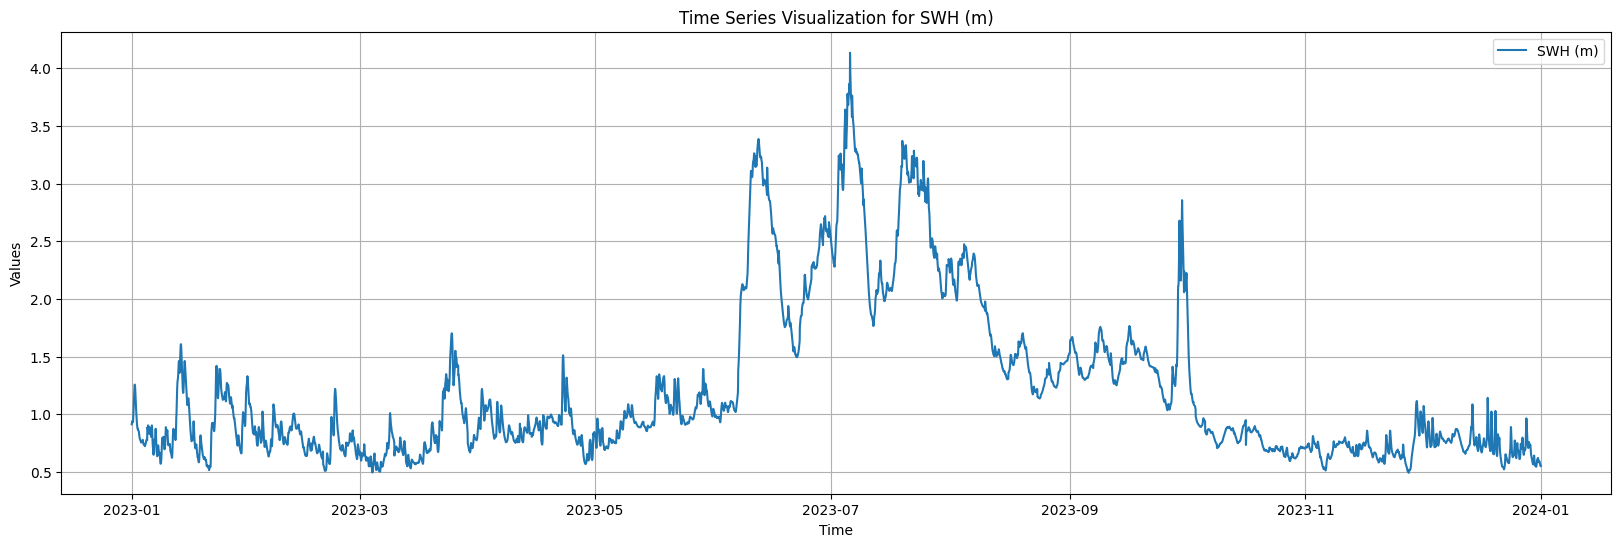

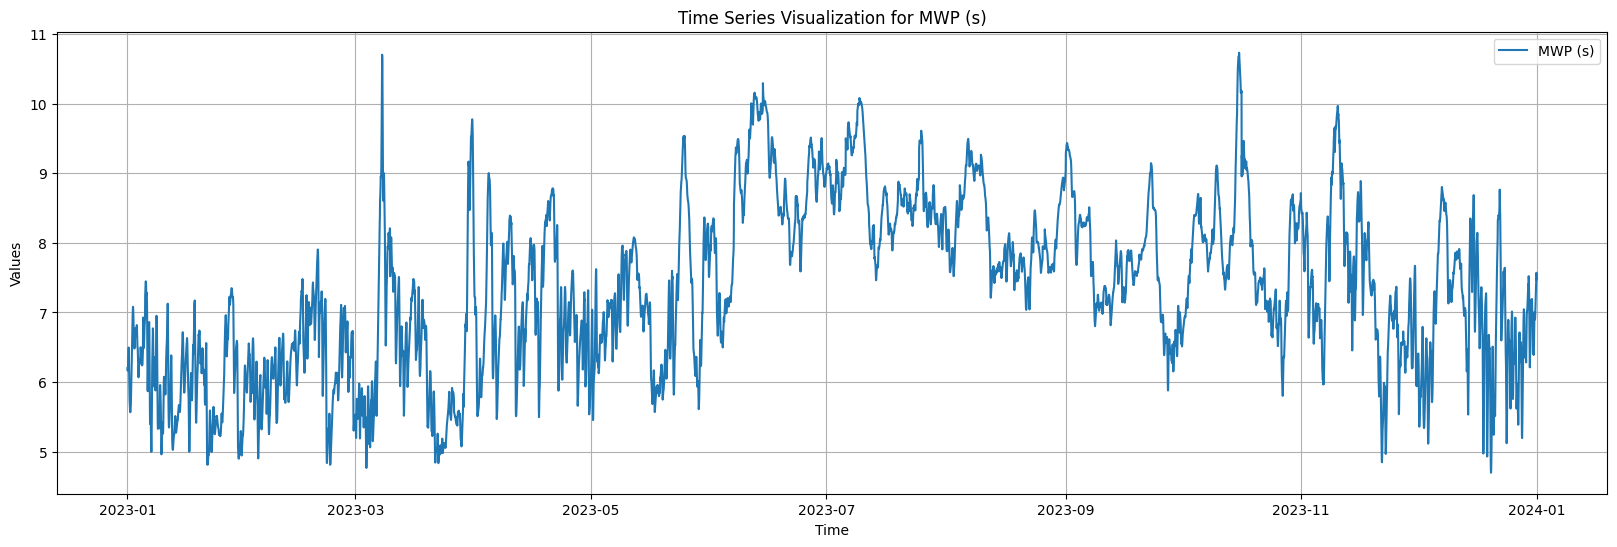

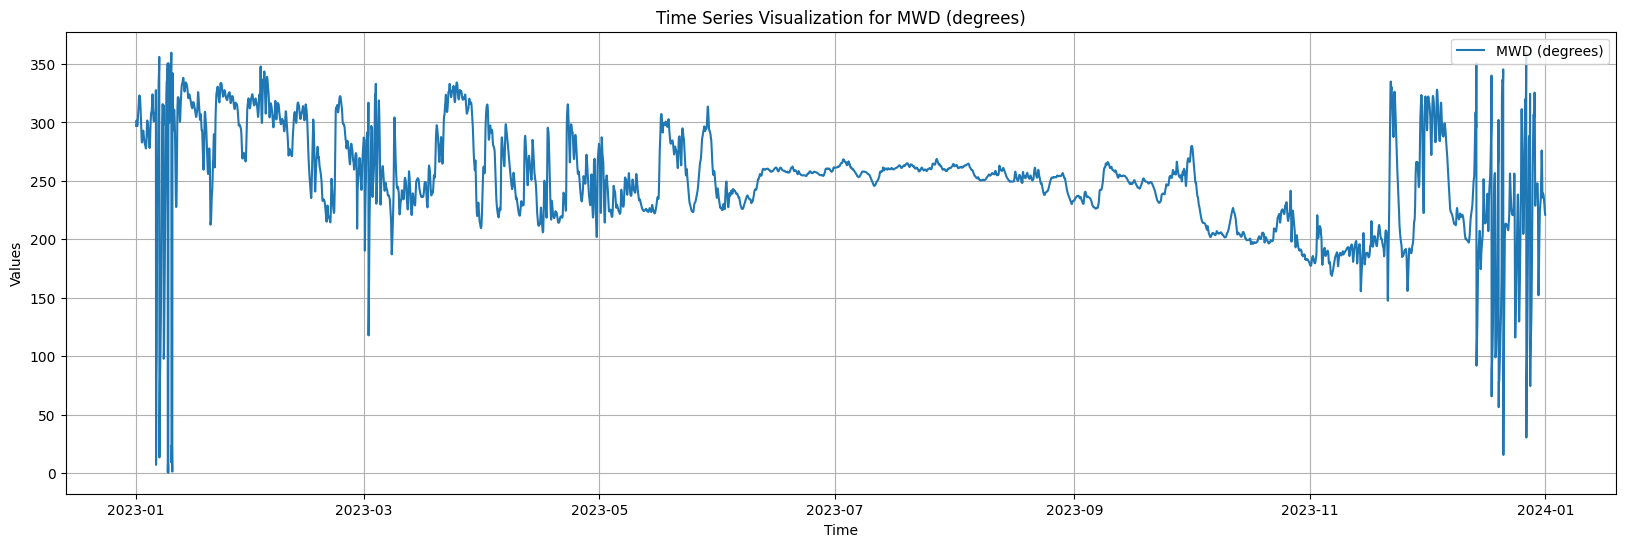

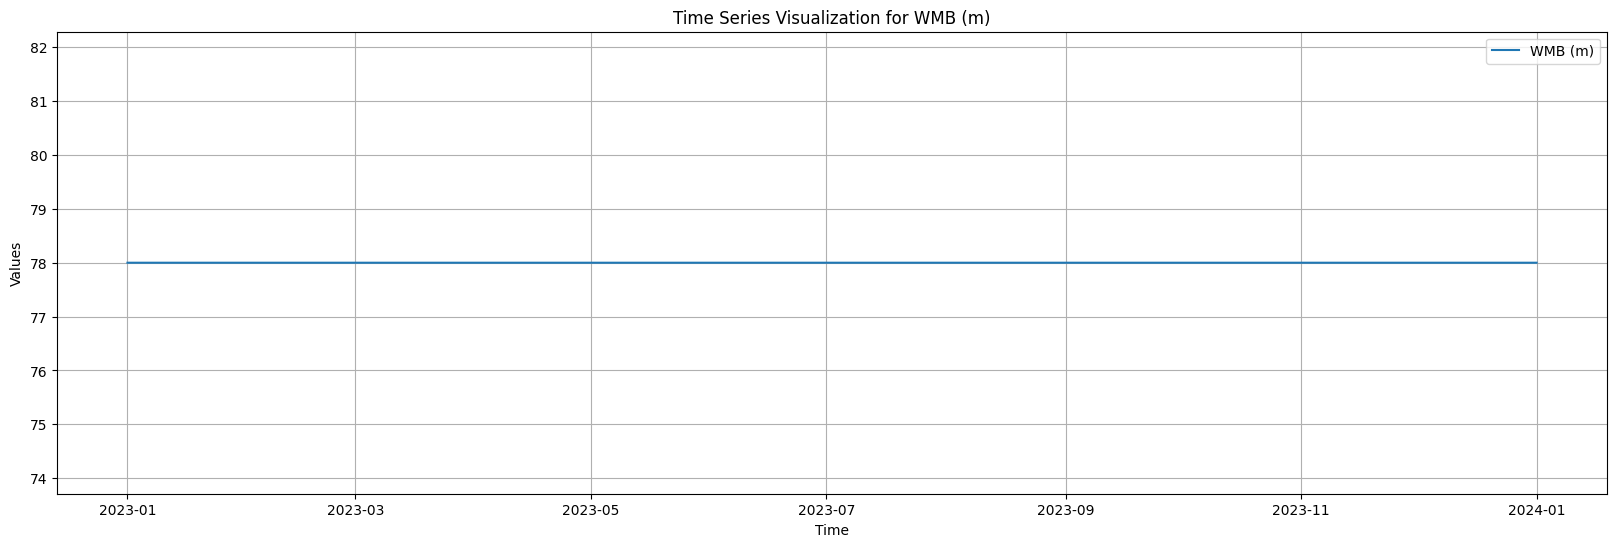

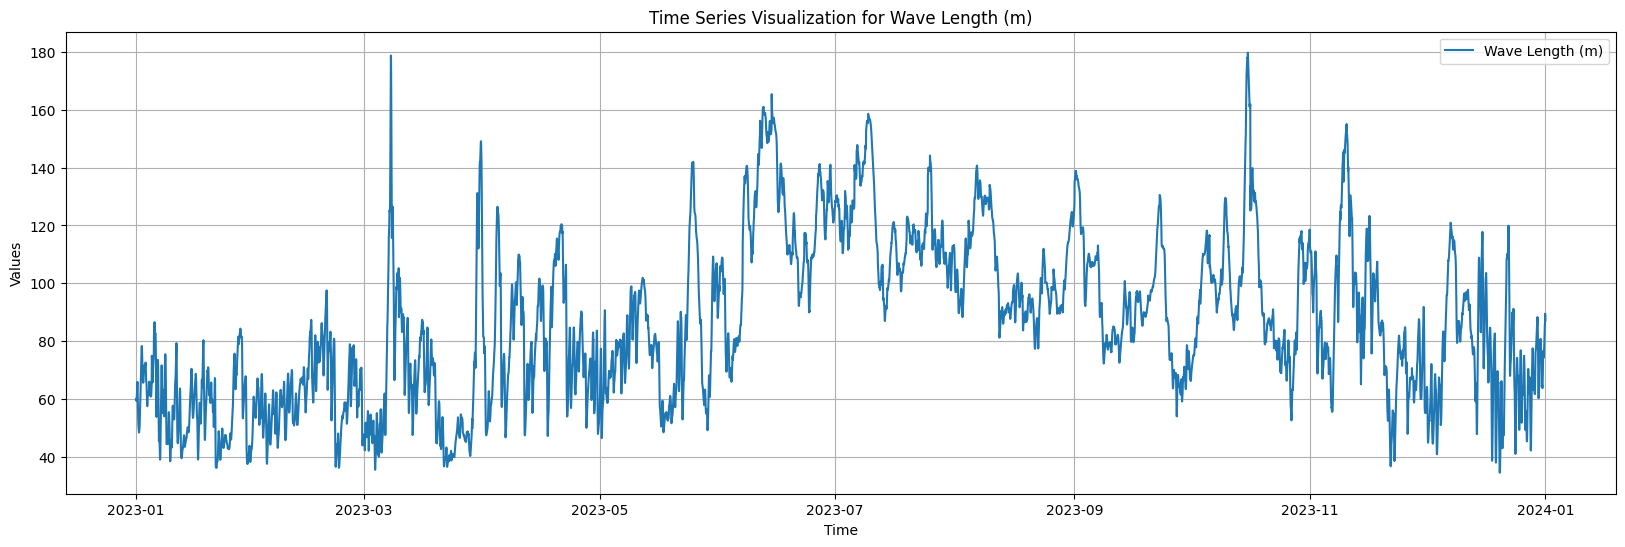

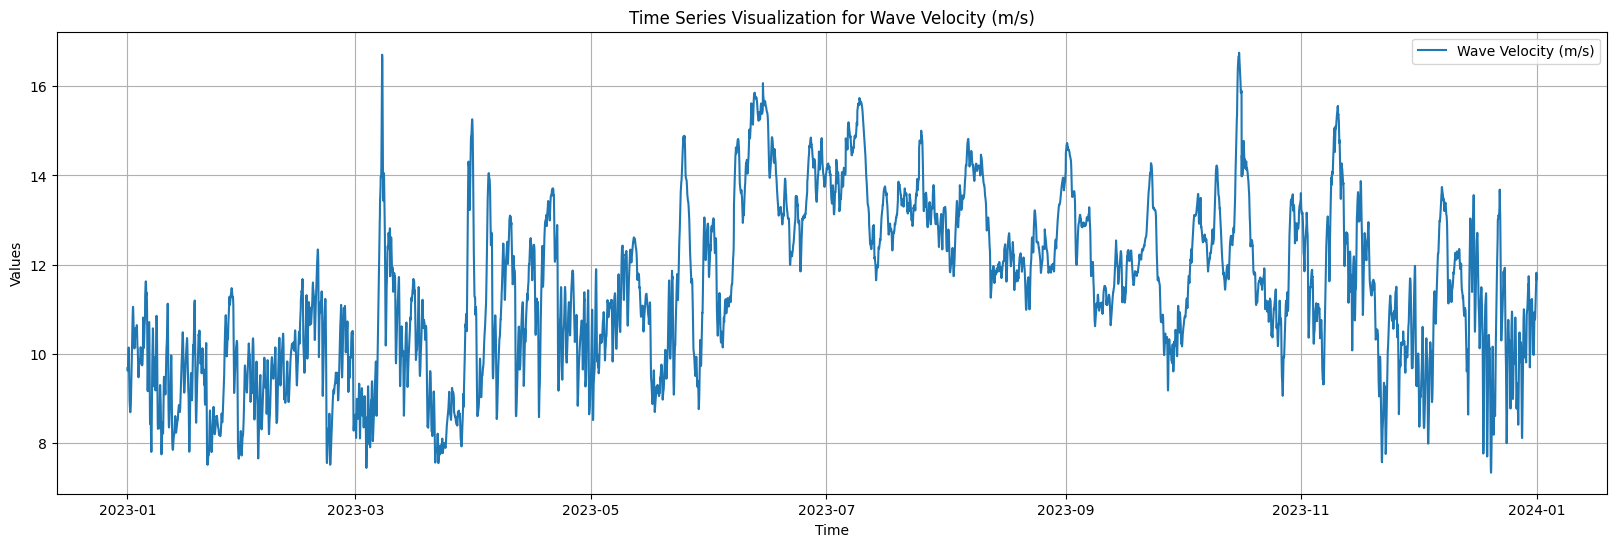

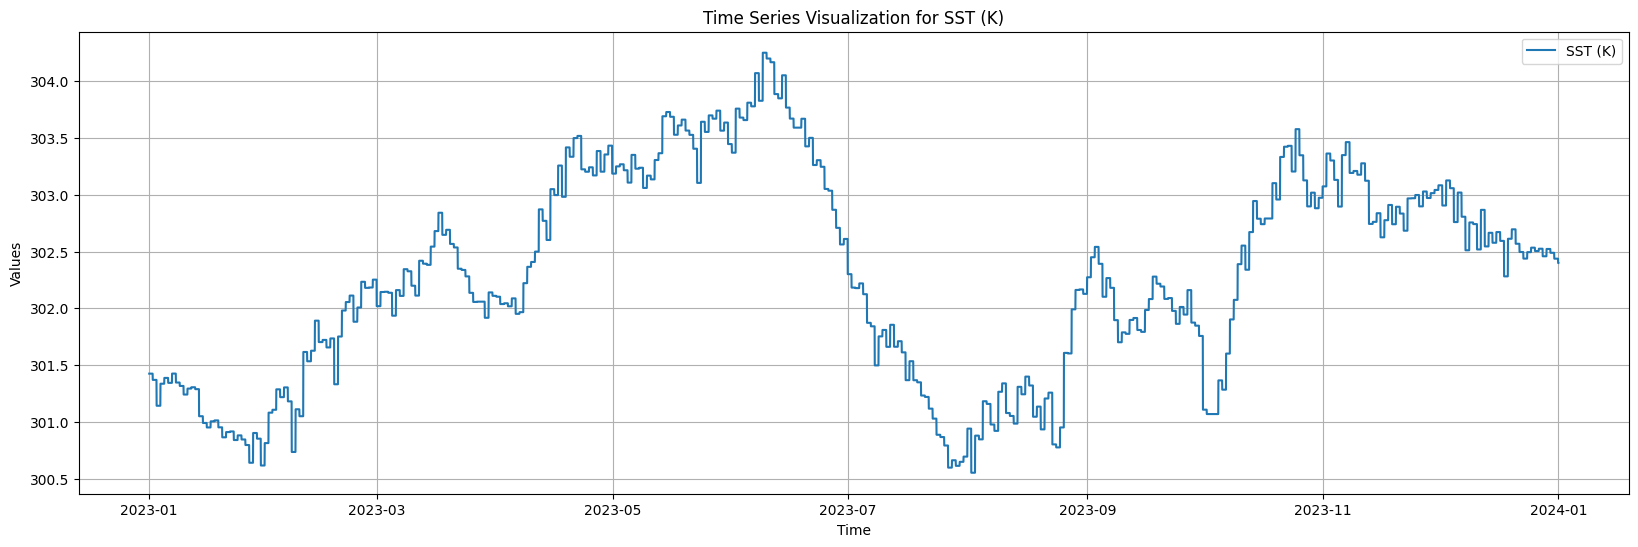

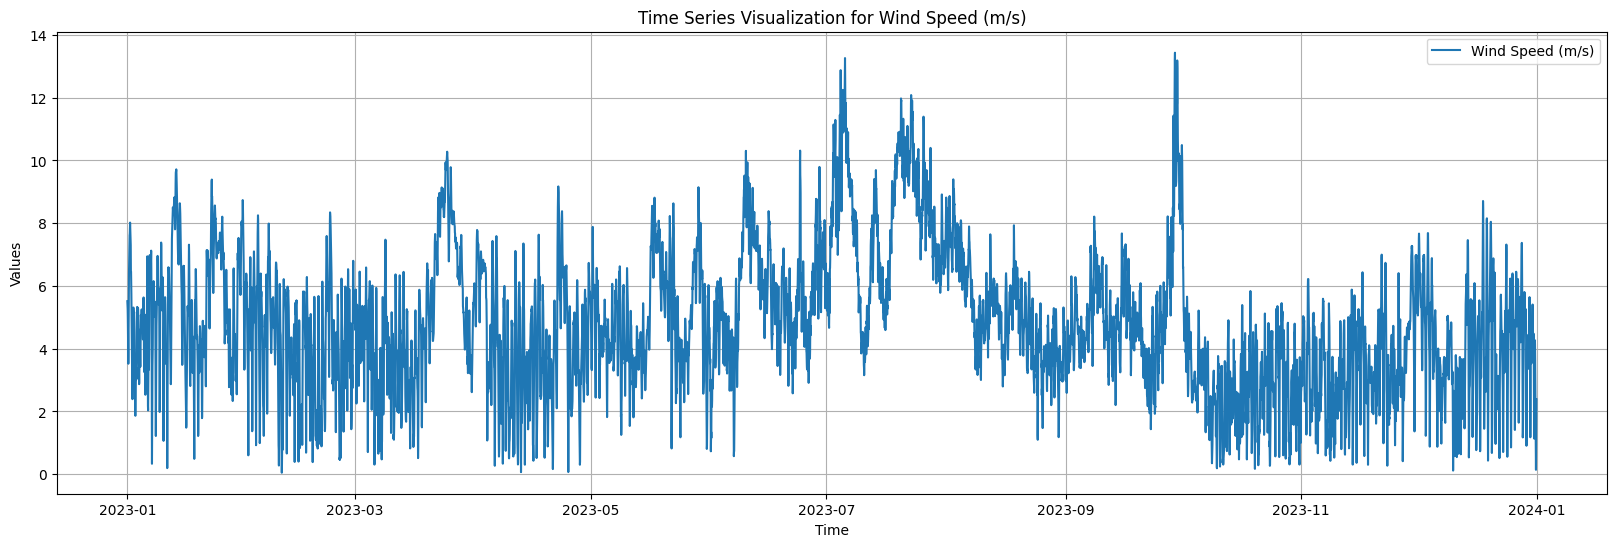

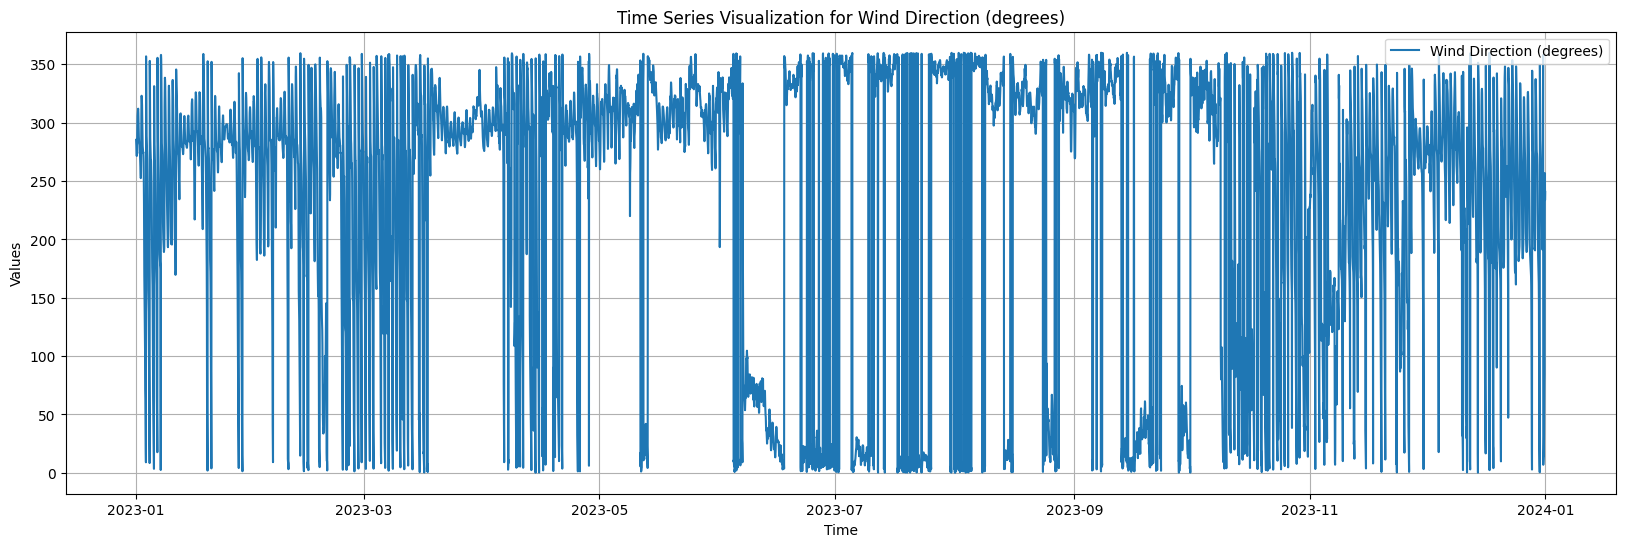

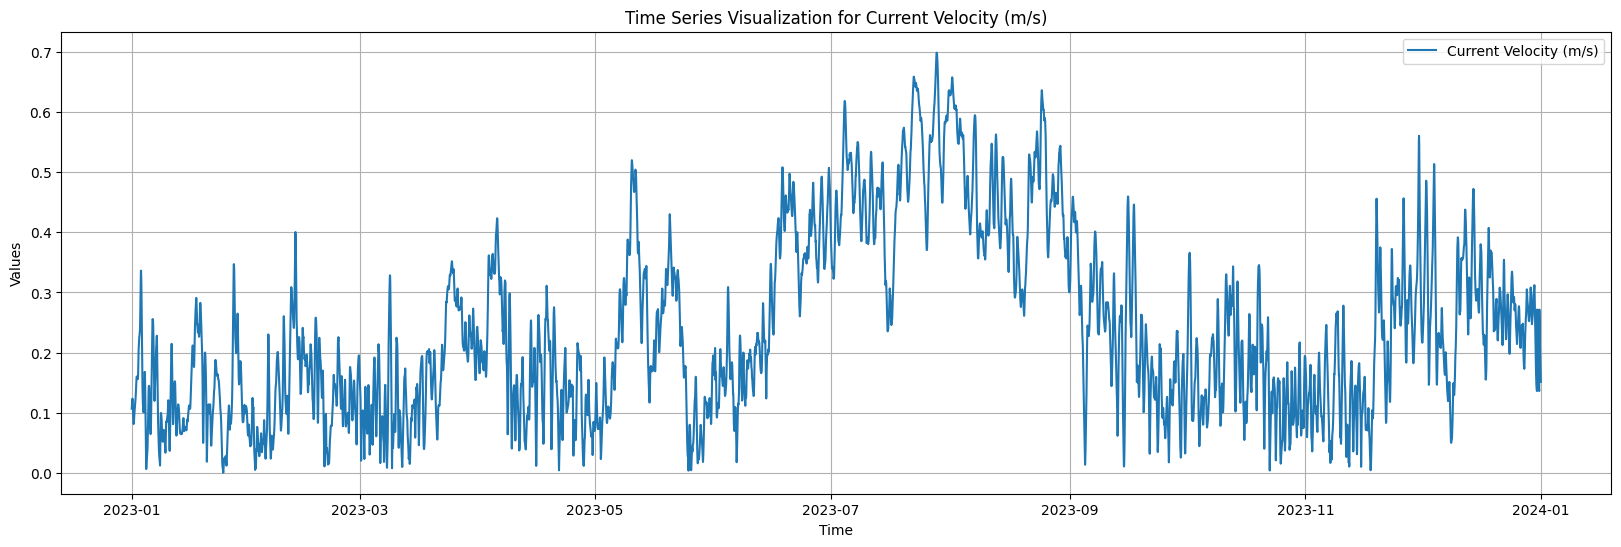

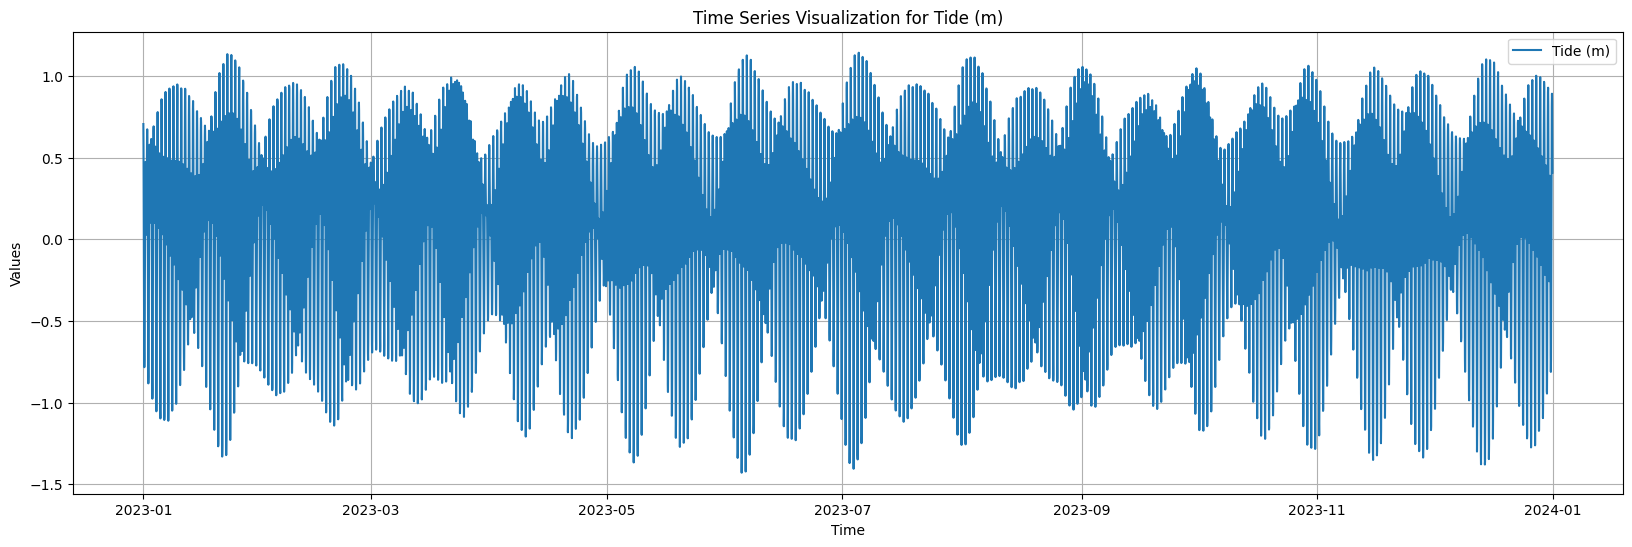

In [ ]:
columns = df.columns

# Visualize each column in the dataset as a time series


for column in columns:
    if column != 'valid_time':  # Exclude 'valid_time' from the plot
        plt.figure(figsize=(20, 6))
        plt.plot(df['valid_time'], df[column], label=column)
        plt.title(f'Time Series Visualization for {column}')
        plt.xlabel('Time')
        plt.ylabel('Values')
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.show()


# **SWH (Significant Wave Height)**

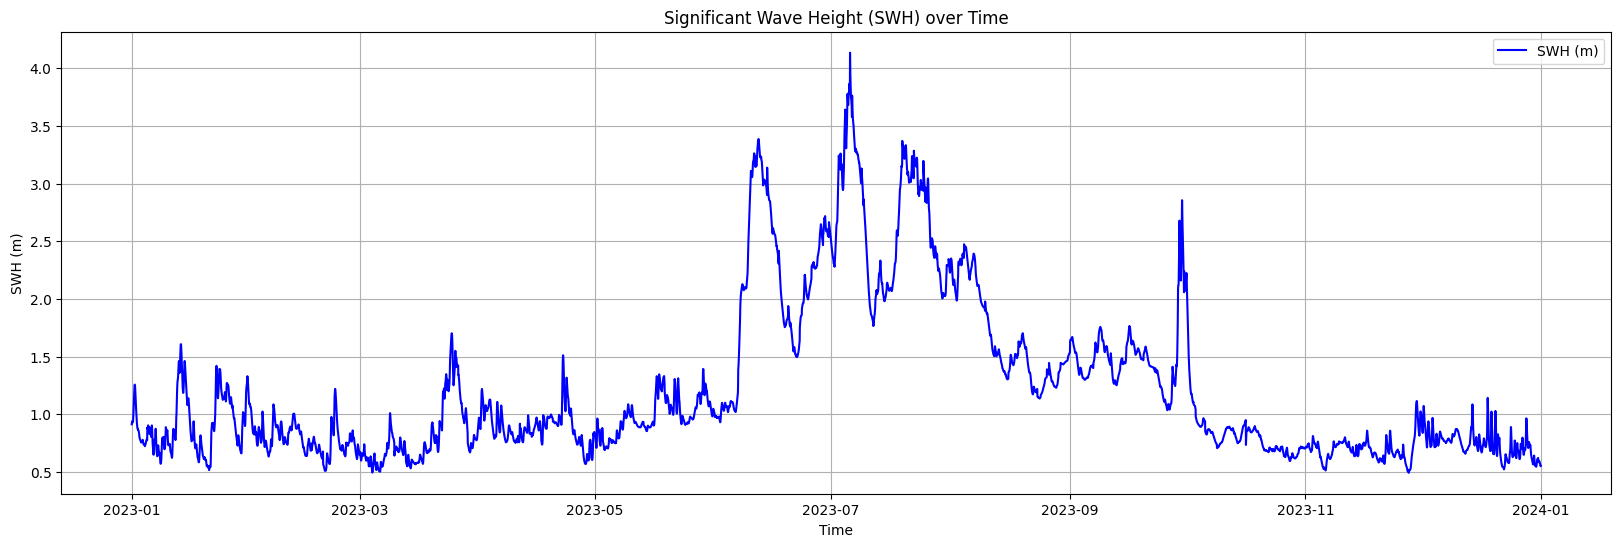

In [ ]:
# Convert 'valid_time' to datetime format
df['valid_time'] = pd.to_datetime(df['valid_time'])

# Plotting the Significant Wave Height (SWH) over time
plt.figure(figsize=(20,6))
plt.plot(df['valid_time'], df['SWH (m)'], label='SWH (m)', color='b')
plt.title('Significant Wave Height (SWH) over Time')
plt.xlabel('Time')
plt.ylabel('SWH (m)')
plt.grid(True)
plt.legend()
plt.show()

### **Decomposition Analysis**

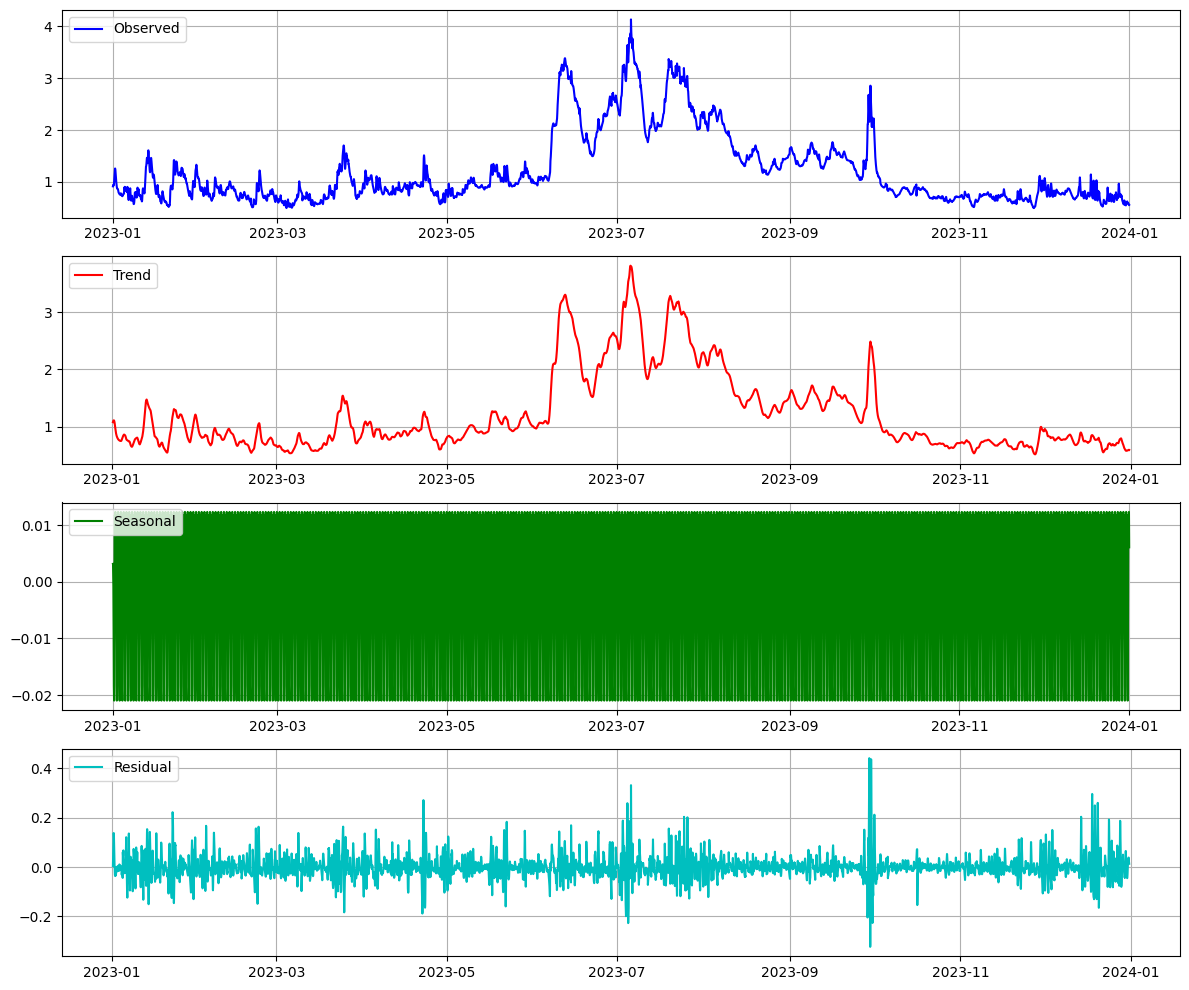

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series into trend, seasonal, and residual components
swh_series = df.set_index('valid_time')['SWH (m)']
decomposition = seasonal_decompose(swh_series, model='additive', period=24)  # Assuming daily seasonality

# Plot the decomposed components
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed', color='b')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='r')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='g')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='c')
plt.legend(loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()


### **ADF (Augmented Dickey-Fuller) test**

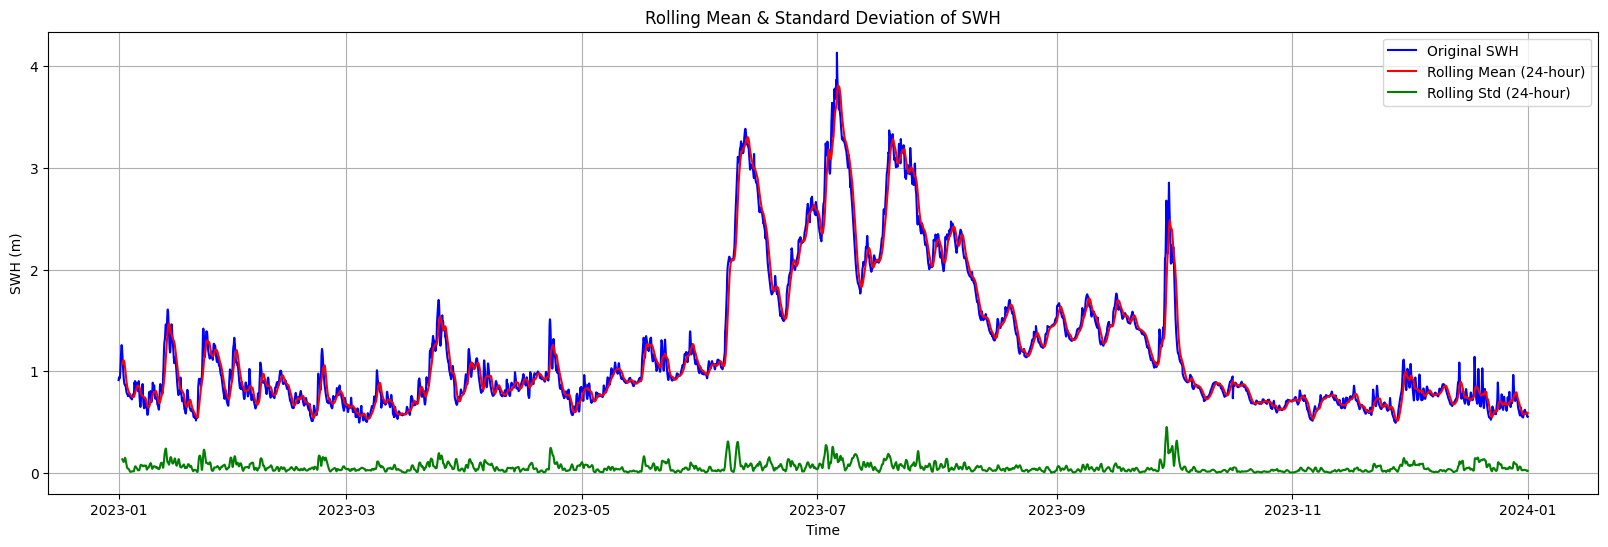

ADF Statistic: -2.814767
p-value: 0.056195
Critical Values:
   1%: -3.431099968539641
   5%: -2.86187143613454
   10%: -2.5669464184887825


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Step 1: Plot rolling statistics
window = 24  # Daily window
rolling_mean = df['SWH (m)'].rolling(window=window).mean()
rolling_std = df['SWH (m)'].rolling(window=window).std()

plt.figure(figsize=(20, 6))
plt.plot(df.index, df['SWH (m)'], label='Original SWH', color='b')
plt.plot(df.index, rolling_mean, label='Rolling Mean (24-hour)', color='r')
plt.plot(df.index, rolling_std, label='Rolling Std (24-hour)', color='g')
plt.title('Rolling Mean & Standard Deviation of SWH')
plt.xlabel('Time')
plt.ylabel('SWH (m)')
plt.legend()
plt.grid(True)
plt.show()

# Step 2: Perform the Augmented Dickey-Fuller test
adf_result = adfuller(df['SWH (m)'])
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

# Interpretation:
# If p-value < 0.05, we reject the null hypothesis and conclude the series is stationary.


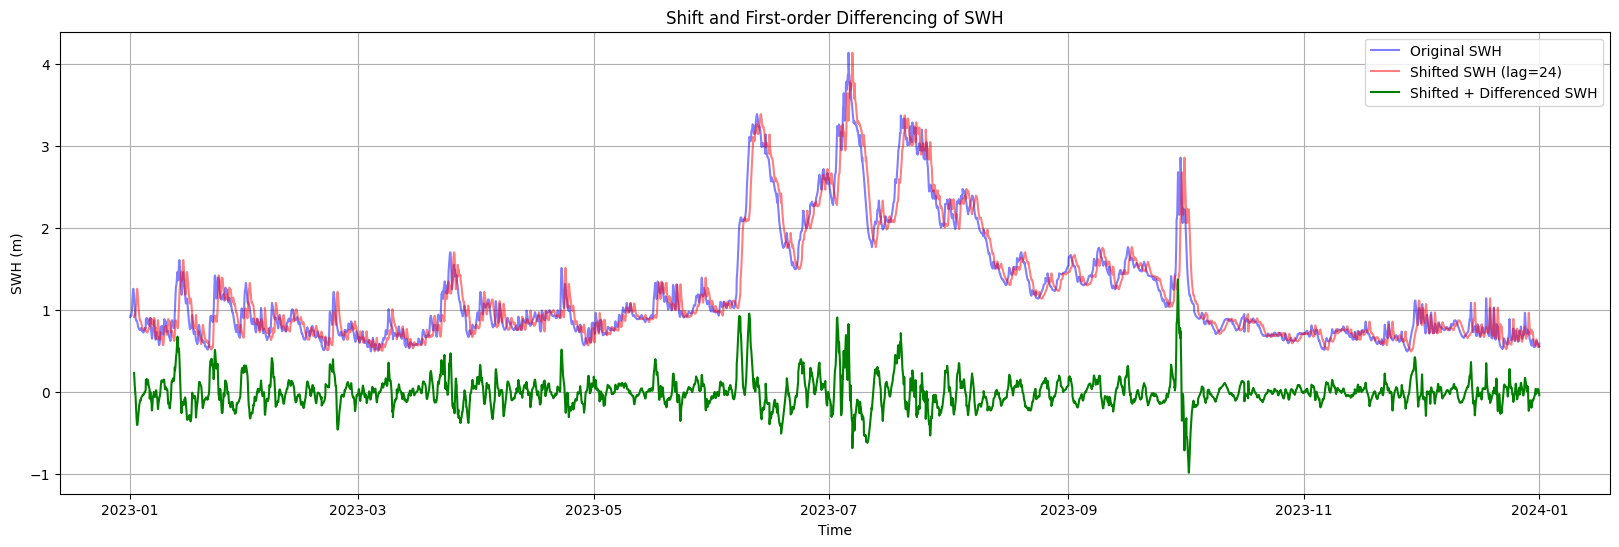

ADF Statistic (Shifted + Differenced): -12.526558
p-value (Shifted + Differenced): 0.000000
Critical Values (Shifted + Differenced):
   1%: -3.4311020385052733
   5%: -2.8618723508056814
   10%: -2.566946905374546


In [ ]:
# Step 1: Shift the SWH values by 1 time step (lag of 24 hour)
df['SWH_shifted'] = df['SWH (m)'].shift(24)

# Step 2: Calculate the first-order difference between the original and shifted data
df['SWH_diff_shifted'] = df['SWH (m)'] - df['SWH_shifted']

# Step 3: Plot the original SWH, shifted SWH, and differenced series
plt.figure(figsize=(20, 6))
plt.plot(df['valid_time'], df['SWH (m)'], label='Original SWH', color='b', alpha=0.5)
plt.plot(df['valid_time'], df['SWH_shifted'], label='Shifted SWH (lag=24)', color='r', alpha=0.5)
plt.plot(df['valid_time'], df['SWH_diff_shifted'], label='Shifted + Differenced SWH', color='g')
plt.title('Shift and First-order Differencing of SWH')
plt.xlabel('Time')
plt.ylabel('SWH (m)')
plt.legend()
plt.grid(True)
plt.show()

# (Optional) Check stationarity again after shifting and differencing
adf_result_shifted_diff = adfuller(df['SWH_diff_shifted'].dropna())  # Drop NaN values
print('ADF Statistic (Shifted + Differenced): %f' % adf_result_shifted_diff[0])
print('p-value (Shifted + Differenced): %f' % adf_result_shifted_diff[1])
print('Critical Values (Shifted + Differenced):')
for key, value in adf_result_shifted_diff[4].items():
    print(f'   {key}: {value}')


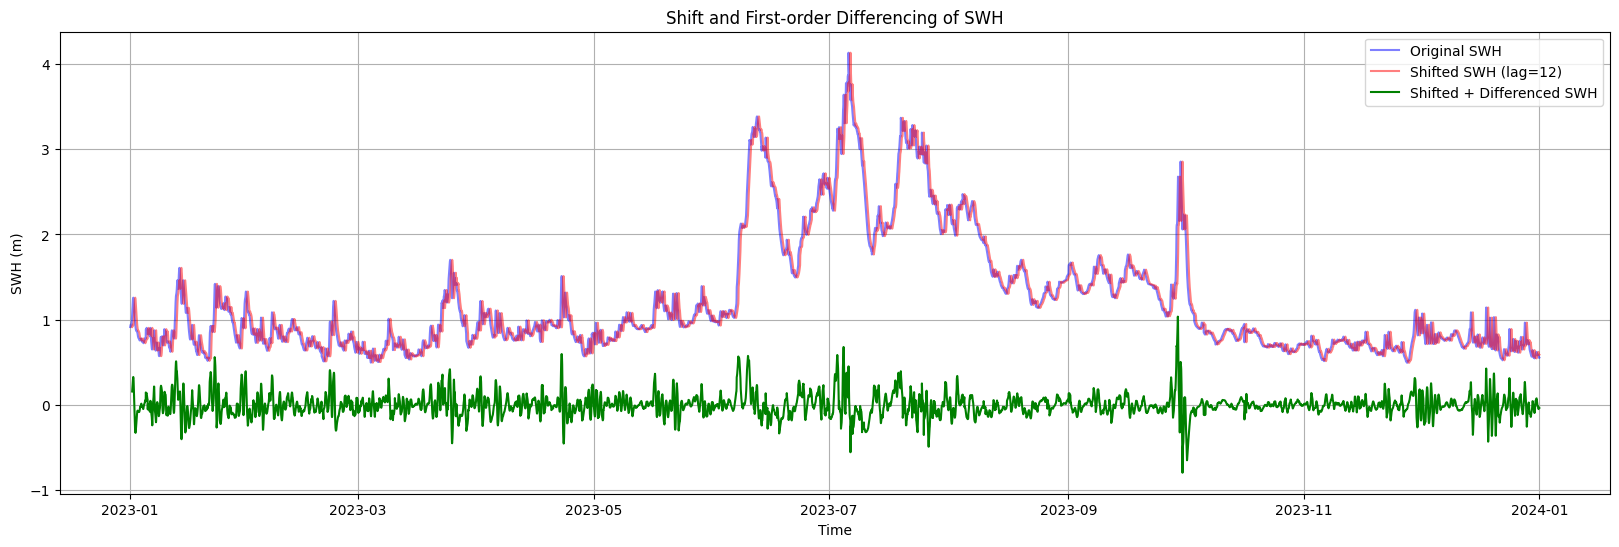

ADF Statistic (Shifted + Differenced): -11.962890
p-value (Shifted + Differenced): 0.000000
Critical Values (Shifted + Differenced):
   1%: -3.431101002096113
   5%: -2.861871892839921
   10%: -2.566946661596196


In [ ]:
# Step 1: Shift the SWH values by 1 time step (lag of 12 hour)
df['SWH_shifted'] = df['SWH (m)'].shift(12)

# Step 2: Calculate the first-order difference between the original and shifted data
df['SWH_diff_shifted'] = df['SWH (m)'] - df['SWH_shifted']

# Step 3: Plot the original SWH, shifted SWH, and differenced series
plt.figure(figsize=(20, 6))
plt.plot(df['valid_time'], df['SWH (m)'], label='Original SWH', color='b', alpha=0.5)
plt.plot(df['valid_time'], df['SWH_shifted'], label='Shifted SWH (lag=12)', color='r', alpha=0.5)
plt.plot(df['valid_time'], df['SWH_diff_shifted'], label='Shifted + Differenced SWH', color='g')
plt.title('Shift and First-order Differencing of SWH')
plt.xlabel('Time')
plt.ylabel('SWH (m)')
plt.legend()
plt.grid(True)
plt.show()

# (Optional) Check stationarity again after shifting and differencing
adf_result_shifted_diff = adfuller(df['SWH_diff_shifted'].dropna())  # Drop NaN values
print('ADF Statistic (Shifted + Differenced): %f' % adf_result_shifted_diff[0])
print('p-value (Shifted + Differenced): %f' % adf_result_shifted_diff[1])
print('Critical Values (Shifted + Differenced):')
for key, value in adf_result_shifted_diff[4].items():
    print(f'   {key}: {value}')


## **Autocorrelation Analysis**

In [ ]:
# Let's read the data from 'Sheet1' and inspect the first few rows to understand its structure
df = pd.read_excel(xls, sheet_name='Sheet1')
df.head()

valid_time   SWH (m)   MWP (s)  MWD (degrees)  WMB (m)  \
0 2023-01-01 00:00:00  0.913489  6.199628     297.024841       78   
1 2023-01-01 01:00:00  0.926315  6.168501     299.492218       78   
2 2023-01-01 02:00:00  0.935679  6.160366     301.271240       78   
3 2023-01-01 03:00:00  0.941087  6.194872     301.798584       78   
4 2023-01-01 04:00:00  0.940675  6.262677     301.215576       78   

   Wave Length (m)  Wave Velocity (m/s)     SST (K)  Wind Speed (m/s)  \
0        60.009552             9.679541  301.426514          5.513513   
1        59.408478             9.630942  301.426514          5.414176   
2        59.251892             9.618242  301.426514          5.267598   
3        59.917515             9.672115  301.426514          4.961535   
4        61.236340             9.777981  301.426514          4.381107   

   Wind Direction (degrees)  Current Velocity (m/s)  Tide (m)  
0                285.310822                0.106924  0.705500  
1                280.778931                0.111127  0.565833  
2                276.447266                0.115497  0.314000  
3                273.530640                0.120191 -0.018833  
4                271.498596                0.123542 -0.376667

In [ ]:
df['valid_time'] = pd.to_datetime(df['valid_time'])
df.set_index('valid_time', inplace=True)

# Ensure the data is sorted by date
df = df.sort_index()

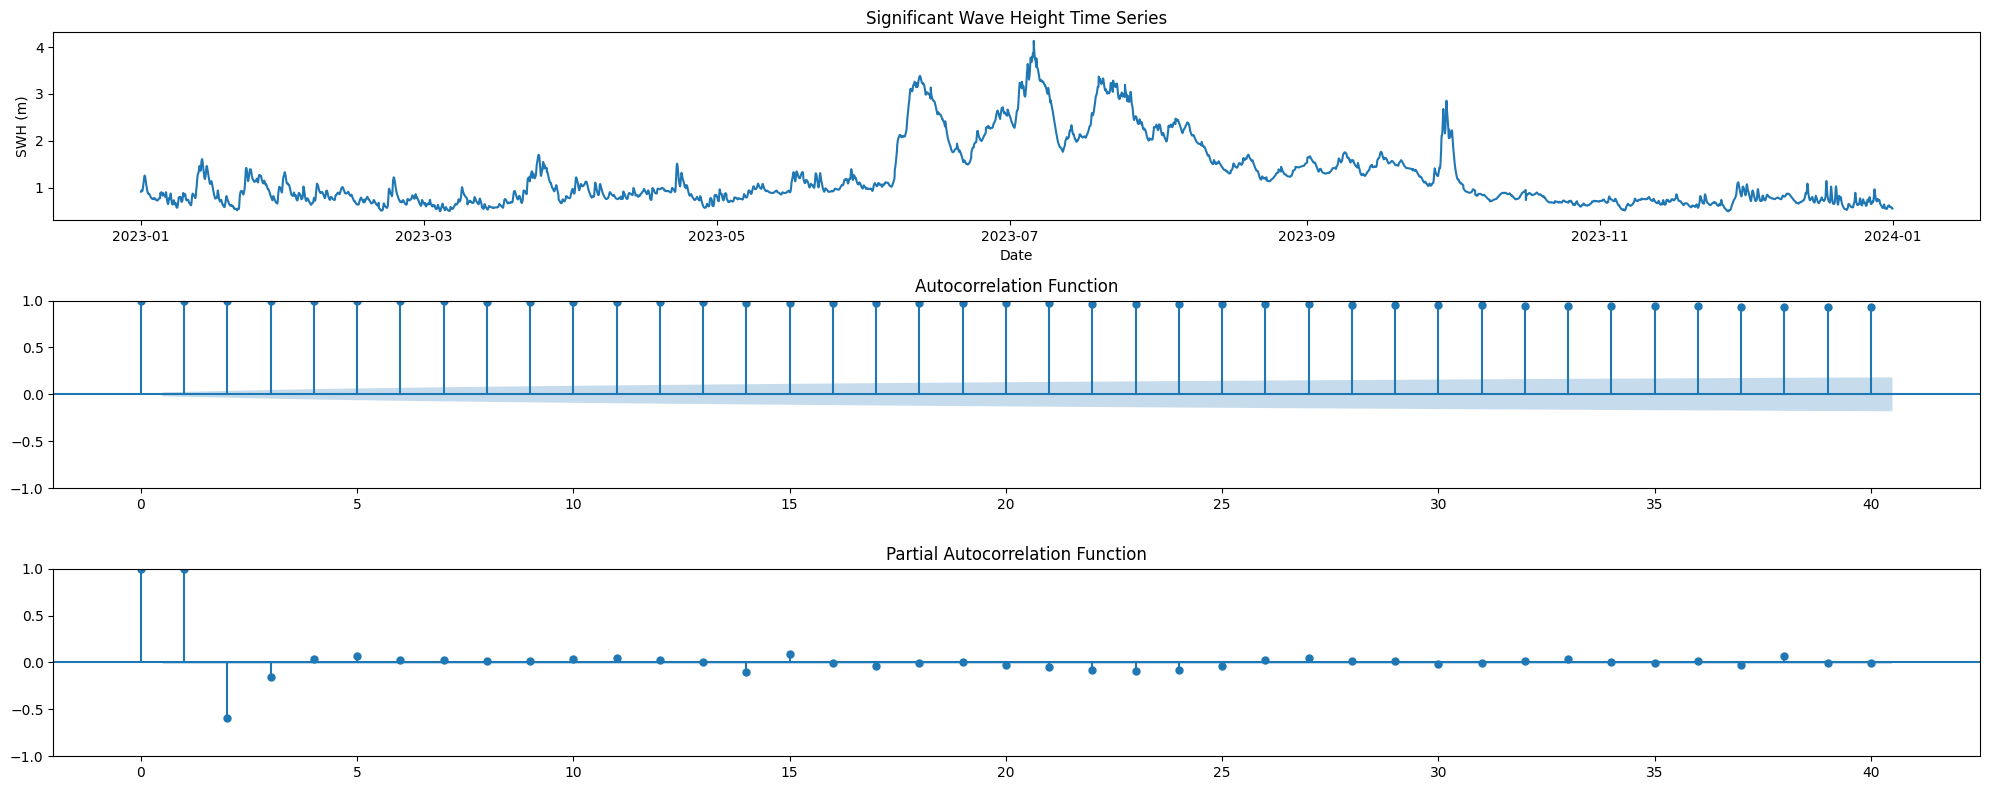

ACF values:
Lag 0: 1.0
Lag 1: 0.9995081667606056
Lag 2: 0.9985064123658648
Lag 3: 0.9971189432905704
Lag 4: 0.9954797771504006
Lag 5: 0.9937012223917008
Lag 6: 0.9918565145674992
Lag 7: 0.990003032105082
Lag 8: 0.988172856340889
Lag 9: 0.9863887467742672
Lag 10: 0.9846739160386095
Lag 11: 0.9830500577188594
Lag 12: 0.9815274554934978
Lag 13: 0.9801001250958005
Lag 14: 0.9787013256638103
Lag 15: 0.977364475500802
Lag 16: 0.9760622989377556
Lag 17: 0.9747711412690866
Lag 18: 0.9734806193795797
Lag 19: 0.9721779079053313
Lag 20: 0.9708449339712064
Lag 21: 0.9694519212376828
Lag 22: 0.967956781963794
Lag 23: 0.9663126315259812
Lag 24: 0.9644836115139087
Lag 25: 0.9624588535800451
Lag 26: 0.9602706156561724
Lag 27: 0.9579669798965662
Lag 28: 0.9556023671563717
Lag 29: 0.953217859307489
Lag 30: 0.9508314556720112
Lag 31: 0.9484611857632763
Lag 32: 0.9461253022804355
Lag 33: 0.9438530233094545
Lag 34: 0.9416572847617984
Lag 35: 0.9395404312471617
Lag 36: 0.9375043610164371
Lag 37: 0.935522945

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Calculate ACF and PACF
lag_acf = acf(df['SWH (m)'], nlags=40)
lag_pacf = pacf(df['SWH (m)'], nlags=40, method='ols')

# Create the plots
plt.figure(figsize=(20, 8))

# Original Time Series
plt.subplot(311)
plt.plot(df.index, df['SWH (m)'])
plt.title('Significant Wave Height Time Series')
plt.xlabel('Date')
plt.ylabel('SWH (m)')

# ACF plot
plt.subplot(312)
plot_acf(df['SWH (m)'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Function')

# PACF plot
plt.subplot(313)
plot_pacf(df['SWH (m)'], lags=40, method='ols', ax=plt.gca())
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

# Print the ACF and PACF values
print("ACF values:")
for i, acf_value in enumerate(lag_acf):
    print(f"Lag {i}: {acf_value}")

print("\nPACF values:")
for i, pacf_value in enumerate(lag_pacf):
    print(f"Lag {i}: {pacf_value}")

# Identify significant lags
confidence_interval = 1.96 / np.sqrt(len(df))  # 95% confidence interval

print("\nSignificant ACF lags:")
for i, acf_value in enumerate(lag_acf):
    if abs(acf_value) > confidence_interval:
        print(f"Lag {i}: {acf_value}")

print("\nSignificant PACF lags:")
for i, pacf_value in enumerate(lag_pacf):
    if abs(pacf_value) > confidence_interval:
        print(f"Lag {i}: {pacf_value}")

# **Feature Extraction**

In [ ]:
# Let's read the data from 'Sheet1' and inspect the first few rows to understand its structure
df = pd.read_excel(xls, sheet_name='Sheet1')
df.head()

valid_time   SWH (m)   MWP (s)  MWD (degrees)  WMB (m)  \
0 2023-01-01 00:00:00  0.913489  6.199628     297.024841       78   
1 2023-01-01 01:00:00  0.926315  6.168501     299.492218       78   
2 2023-01-01 02:00:00  0.935679  6.160366     301.271240       78   
3 2023-01-01 03:00:00  0.941087  6.194872     301.798584       78   
4 2023-01-01 04:00:00  0.940675  6.262677     301.215576       78   

   Wave Length (m)  Wave Velocity (m/s)     SST (K)  Wind Speed (m/s)  \
0        60.009552             9.679541  301.426514          5.513513   
1        59.408478             9.630942  301.426514          5.414176   
2        59.251892             9.618242  301.426514          5.267598   
3        59.917515             9.672115  301.426514          4.961535   
4        61.236340             9.777981  301.426514          4.381107   

   Wind Direction (degrees)  Current Velocity (m/s)  Tide (m)  
0                285.310822                0.106924  0.705500  
1                280.778931                0.111127  0.565833  
2                276.447266                0.115497  0.314000  
3                273.530640                0.120191 -0.018833  
4                271.498596                0.123542 -0.376667

In [ ]:
df['valid_time'] = pd.to_datetime(df['valid_time'])
df.set_index('valid_time', inplace=True)

# Ensure the data is sorted by date
df = df.sort_index()

In [ ]:
from statsmodels.tsa.stattools import adfuller


def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    return result[1] <= 0.05  # p-value <= 0.05 indicates stationarity

def create_lag_features(df, variables, lags):
    for var in variables:
        for lag in lags:
            df[f'{var}_lag_{lag}'] = df[var].shift(lag)
    return df


In [ ]:
y = df["SWH (m)"]
df_final = df.drop(columns = ["SWH (m)", "MWP (s)", "WMB (m)"])

In [ ]:
features = df_final.columns
features

Index(['MWD (degrees)', 'Wave Length (m)', 'Wave Velocity (m/s)', 'SST (K)',
       'Wind Speed (m/s)', 'Wind Direction (degrees)',
       'Current Velocity (m/s)', 'Tide (m)'],
      dtype='object')

In [ ]:

# Check for trends in each feature
trend_results = {feature: check_stationarity(df[feature]) for feature in features}

print("Stationarity results:")
for feature, is_stationary in trend_results.items():
    print(f"{feature}: {'Stationary' if is_stationary else 'Non-stationary'}")

Stationarity results:
MWD (degrees): Stationary
Wave Length (m): Stationary
Wave Velocity (m/s): Stationary
SST (K): Non-stationary
Wind Speed (m/s): Stationary
Wind Direction (degrees): Stationary
Current Velocity (m/s): Stationary
Tide (m): Non-stationary


In [ ]:
def create_cyclical_features(df):
    """
    Create cyclical features from temporal variables.
    """
    # Hour of day
    df['hour_sin'] = np.sin(2 * np.pi * df.index.hour/24)
    df['hour_cos'] = np.cos(2 * np.pi * df.index.hour/24)

    # Day of week
    df['dayofweek_sin'] = np.sin(2 * np.pi * df.index.dayofweek/7)
    df['dayofweek_cos'] = np.cos(2 * np.pi * df.index.dayofweek/7)

    # Month of year
    df['month_sin'] = np.sin(2 * np.pi * df.index.month/12)
    df['month_cos'] = np.cos(2 * np.pi * df.index.month/12)

    # Day of year
    df['dayofyear_sin'] = np.sin(2 * np.pi * df.index.dayofyear/365.25)
    df['dayofyear_cos'] = np.cos(2 * np.pi * df.index.dayofyear/365.25)

    return df

def create_interaction_features(df):
    """
    Create interaction features between relevant variables.
    """
    # Wind-Wave interactions
    df['wind_wave_power'] = df['Wind Speed (m/s)'] ** 2 * df['Wave Velocity (m/s)']
    df['wind_wave_direction'] = df['Wind Speed (m/s)'] * np.cos(np.radians(df['MWD (degrees)']))

    # Temperature-Wave interactions
    df['temp_wave_interaction'] = df['SST (K)'] * df['Wave Velocity (m/s)']
    df['temp_wind_interaction'] = df['SST (K)'] * df['Wind Speed (m/s)']

    # Current-Wave interactions
    df['current_wave_interaction'] = df['Current Velocity (m/s)'] * df['Wave Velocity (m/s)']
    df['current_wind_interaction'] = df['Current Velocity (m/s)'] * df['Wind Speed (m/s)']

    # Tidal interactions
    df['tidal_wave_interaction'] = df['Tide (m)'] * df['Wave Velocity (m/s)']
    df['tidal_current_interaction'] = df['Tide (m)'] * df['Current Velocity (m/s)']

    # Complex interactions
    df['wave_energy_proxy'] = df['Wave Length (m)'] * df['Wave Velocity (m/s)'] ** 2

    return df

def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()

    # Add cyclical features
    df = create_cyclical_features(df)

    # Add interaction features
    df = create_interaction_features(df)

    # Original feature columns
    feature_columns = ['MWD (degrees)', 'Wave Length (m)', 'Wave Velocity (m/s)',
                      'SST (K)', 'Wind Speed (m/s)', 'Wind Direction (degrees)',
                      'Current Velocity (m/s)', 'Tide (m)']

    # Rolling features
    windows = [3, 6, 12, 24]  # Assuming hourly data

    for feature in feature_columns:
        for window in windows:
            # Rolling mean
            df[f'{feature}_rolling_mean_{window}'] = df[feature].rolling(
                window=window, min_periods=1).mean()

            # Rolling std
            df[f'{feature}_rolling_std_{window}'] = df[feature].rolling(
                window=window, min_periods=1).std()

            # Rolling max
            df[f'{feature}_rolling_max_{window}'] = df[feature].rolling(
                window=window, min_periods=1).max()

            # Rolling min
            df[f'{feature}_rolling_min_{window}'] = df[feature].rolling(
                window=window, min_periods=1).min()

            # Rolling skew
            df[f'{feature}_rolling_skew_{window}'] = df[feature].rolling(
                window=window, min_periods=1).skew()

    # Lag features
    lags = [1, 2, 3, 6, 12, 24]

    for feature in feature_columns:
        for lag in lags:
            df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)

    # Difference features at multiple levels
    for feature in feature_columns:
        df[f'{feature}_diff_1'] = df[feature].diff()
        df[f'{feature}_diff_2'] = df[feature].diff(2)
        df[f'{feature}_pct_change'] = df[feature].pct_change()

    # Rate of change features
    for feature in feature_columns:
        df[f'{feature}_roc_1'] = df[feature].diff() / df[feature].shift(1)
        df[f'{feature}_roc_12'] = (df[feature] - df[feature].shift(12)) / df[feature].shift(12)

    return df

In [ ]:
df_final = create_features(df)

<ipython-input-7-d52003ce6721>:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feature}_rolling_std_{window}'] = df[feature].rolling(
<ipython-input-7-d52003ce6721>:79: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feature}_rolling_max_{window}'] = df[feature].rolling(
<ipython-input-7-d52003ce6721>:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

In [ ]:
df_final

SWH (m)   MWP (s)  MWD (degrees)  WMB (m)  \
valid_time                                                        
2023-01-01 00:00:00  0.913489  6.199628     297.024841       78   
2023-01-01 01:00:00  0.926315  6.168501     299.492218       78   
2023-01-01 02:00:00  0.935679  6.160366     301.271240       78   
2023-01-01 03:00:00  0.941087  6.194872     301.798584       78   
2023-01-01 04:00:00  0.940675  6.262677     301.215576       78   
...                       ...       ...            ...      ...   
2023-12-31 19:00:00  0.566590  7.333844     226.846298       78   
2023-12-31 20:00:00  0.562095  7.398284     225.093842       78   
2023-12-31 21:00:00  0.558154  7.449719     223.485779       78   
2023-12-31 22:00:00  0.550133  7.569637     222.507385       78   
2023-12-31 23:00:00  0.553665  7.473798     221.024857       78   

                     Wave Length (m)  Wave Velocity (m/s)     SST (K)  \
valid_time                                                              
2023-01-01 00:00:00        60.009552             9.679541  301.426514   
2023-01-01 01:00:00        59.408478             9.630942  301.426514   
2023-01-01 02:00:00        59.251892             9.618242  301.426514   
2023-01-01 03:00:00        59.917515             9.672115  301.426514   
2023-01-01 04:00:00        61.236340             9.777981  301.426514   
...                              ...                  ...         ...   
2023-12-31 19:00:00        83.975487            11.450405  302.437012   
2023-12-31 20:00:00        85.457680            11.551014  302.437012   
2023-12-31 21:00:00        86.650085            11.631322  302.437012   
2023-12-31 22:00:00        89.462143            11.818551  302.398682   
2023-12-31 23:00:00        87.211121            11.668917  302.398682   

                     Wind Speed (m/s)  Wind Direction (degrees)  \
valid_time                                                        
2023-01-01 00:00:00          5.513513                285.310822   
2023-01-01 01:00:00          5.414176                280.778931   
2023-01-01 02:00:00          5.267598                276.447266   
2023-01-01 03:00:00          4.961535                273.530640   
2023-01-01 04:00:00          4.381107                271.498596   
...                               ...                       ...   
2023-12-31 19:00:00          0.766792                 84.546371   
2023-12-31 20:00:00          0.137918                216.836945   
2023-12-31 21:00:00          0.970841                256.796143   
2023-12-31 22:00:00          1.524606                233.677170   
2023-12-31 23:00:00          2.385033                240.690826   

                     Current Velocity (m/s)  ...  SST (K)_roc_1  \
valid_time                                   ...                  
2023-01-01 00:00:00                0.106924  ...            NaN   
2023-01-01 01:00:00                0.111127  ...       0.000000   
2023-01-01 02:00:00                0.115497  ...       0.000000   
2023-01-01 03:00:00                0.120191  ...       0.000000   
2023-01-01 04:00:00                0.123542  ...       0.000000   
...                                     ...  ...            ...   
2023-12-31 19:00:00                0.193851  ...       0.000000   
2023-12-31 20:00:00                0.181400  ...       0.000000   
2023-12-31 21:00:00                0.170041  ...       0.000000   
2023-12-31 22:00:00                0.160019  ...      -0.000127   
2023-12-31 23:00:00                0.151467  ...       0.000000   

                     SST (K)_roc_12  Wind Speed (m/s)_roc_1  \
valid_time                                                    
2023-01-01 00:00:00             NaN                     NaN   
2023-01-01 01:00:00             NaN               -0.018017   
2023-01-01 02:00:00             NaN               -0.027073   
2023-01-01 03:00:00             NaN               -0.058103   
2023-01-01 04:00:00             NaN               -0.116986   
...            

In [ ]:
feature_list = [df_final.columns]
feature_list

[Index(['SWH (m)', 'MWP (s)', 'MWD (degrees)', 'WMB (m)', 'Wave Length (m)',
        'Wave Velocity (m/s)', 'SST (K)', 'Wind Speed (m/s)',
        'Wind Direction (degrees)', 'Current Velocity (m/s)',
        ...
        'SST (K)_roc_1', 'SST (K)_roc_12', 'Wind Speed (m/s)_roc_1',
        'Wind Speed (m/s)_roc_12', 'Wind Direction (degrees)_roc_1',
        'Wind Direction (degrees)_roc_12', 'Current Velocity (m/s)_roc_1',
        'Current Velocity (m/s)_roc_12', 'Tide (m)_roc_1', 'Tide (m)_roc_12'],
       dtype='object', length=276)]

## **Random Forest**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Drop NaN values created by rolling calculations
df_final = df_final.dropna()

# Separate features and target
X = df_final.drop('SWH (m)', axis=1)
y = df_final['SWH (m)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_model = RandomForestRegressor(
    n_estimators=200,  # Increased number of trees
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
# Make predictions
train_predictions = rf_model.predict(X_train)
test_predictions = rf_model.predict(X_test)

# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

Train RMSE: 0.009270230606690875
Test RMSE: 0.026419508107680827
Train R^2: 0.9998202400311621
Test R^2: 0.9985739309949426


In [ ]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance)

                              feature    importance
17                      dayofyear_cos  6.377229e-01
125   Wind Speed (m/s)_rolling_min_24  1.978373e-01
14                          month_sin  6.192101e-02
122  Wind Speed (m/s)_rolling_mean_24  1.413223e-02
16                      dayofyear_sin  1.099821e-02
..                                ...           ...
91             SST (K)_rolling_skew_3  2.496546e-07
265                     SST (K)_roc_1  1.737639e-07
246                SST (K)_pct_change  8.910769e-08
244                    SST (K)_diff_1  5.777761e-08
2                             WMB (m)  0.000000e+00

[275 rows x 2 columns]


## **XGBoost**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Drop NaN values created by rolling calculations
df_final = df_final.dropna()

# Separate features and target
X = df_final.drop('SWH (m)', axis=1)
y = df_final['SWH (m)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100
}


In [ ]:
# Train the model
model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtrain, 'train'), (dtest, 'test')], early_stopping_rounds=10, verbose_eval=10)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:04:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:0.62433	test-rmse:0.63159
[10]	train-rmse:0.23223	test-rmse:0.23427
[20]	train-rmse:0.09527	test-rmse:0.09744
[30]	train-rmse:0.04870	test-rmse:0.05303
[40]	train-rmse:0.03249	test-rmse:0.03934
[50]	train-rmse:0.02566	test-rmse:0.03439
[60]	train-rmse:0.02134	test-rmse:0.03162
[70]	train-rmse:0.01850	test-rmse:0.02988
[80]	train-rmse:0.01655	test-rmse:0.02869
[90]	train-rmse:0.01498	test-rmse:0.02772
[99]	train-rmse:0.01385	test-rmse:0.02716


In [ ]:
# Make predictions
y_pred = model.predict(dtest)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared Score: {r2:.4f}")

Root Mean Squared Error: 0.0272
R-squared Score: 0.9985


In [ ]:
# Feature importance
feature_importance = model.get_score(importance_type='weight')
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_importance:
    print(f"Feature {feature}: {importance}")

Feature MWP (s): 173.0
Feature dayofyear_sin: 159.0
Feature dayofyear_cos: 147.0
Feature MWD (degrees): 116.0
Feature Wind Speed (m/s)_rolling_min_24: 112.0
Feature Wave Length (m)_rolling_min_24: 98.0
Feature Tide (m)_rolling_max_24: 89.0
Feature Wind Speed (m/s)_rolling_max_12: 81.0
Feature Wind Speed (m/s)_rolling_max_24: 75.0
Feature Wind Speed (m/s)_rolling_mean_6: 71.0
Feature Wind Direction (degrees)_rolling_max_24: 60.0
Feature MWD (degrees)_rolling_min_24: 59.0
Feature SST (K): 58.0
Feature Wind Speed (m/s)_rolling_max_6: 55.0
Feature Wind Speed (m/s)_rolling_mean_24: 54.0
Feature MWD (degrees)_roc_12: 54.0
Feature month_sin: 52.0
Feature Wave Length (m)_rolling_min_12: 52.0
Feature Wind Direction (degrees)_rolling_mean_24: 52.0
Feature Tide (m)_rolling_skew_24: 52.0
Feature Wind Speed (m/s)_rolling_std_24: 51.0
Feature wind_wave_power: 49.0
Feature Wave Length (m)_lag_12: 49.0
Feature Tide (m)_rolling_min_24: 48.0
Feature MWD (degrees)_rolling_skew_24: 47.0
Feature Wind Direc

## **LGBM**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler

# Drop NaN values created by rolling calculations
df_final = df_final.dropna()

# Separate features and target
X = df_final.drop('SWH (m)', axis=1)
y = df_final['SWH (m)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the LGBM model
model = LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=7,
    num_leaves=31,
    random_state=42
)

In [ ]:
model.fit(X_train_scaled, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025930 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67421
[LightGBM] [Info] Number of data points in the train set: 6988, number of used features: 274
[LightGBM] [Info] Start training from score 1.216960
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

LGBMRegressor(max_depth=7, random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Root Mean Squared Error: 0.029051411012266277
R-squared Score: 0.998275649499863


In [ ]:
features = [col for col in X.columns]

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                             feature  importance
17                     dayofyear_cos         155
125  Wind Speed (m/s)_rolling_min_24         115
16                     dayofyear_sin         108
184          Tide (m)_rolling_max_24          68
65    Wave Length (m)_rolling_min_24          64
..                               ...         ...
224     Current Velocity (m/s)_lag_2           0
229                   Tide (m)_lag_1           0
243   Wave Velocity (m/s)_pct_change           0
244                   SST (K)_diff_1           0
4                Wave Velocity (m/s)           0

[275 rows x 2 columns]


## **Cat Boost**

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.0 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler

# Drop NaN values created by rolling calculations
df_final = df_final.dropna()

# Separate features and target
X = df_final.drop('SWH (m)', axis=1)
y = df_final['SWH (m)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the CatBoost model
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=3,
    loss_function='RMSE',
    verbose=100
)

In [ ]:
model.fit(X_train_scaled, y_train, eval_set=(X_test_scaled, y_test), early_stopping_rounds=50)

0:	learn: 0.6617404	test: 0.6698399	best: 0.6698399 (0)	total: 333ms	remaining: 5m 32s
100:	learn: 0.0685512	test: 0.0706249	best: 0.0706249 (100)	total: 15.1s	remaining: 2m 14s
200:	learn: 0.0461428	test: 0.0503900	best: 0.0503900 (200)	total: 22.7s	remaining: 1m 30s
300:	learn: 0.0340306	test: 0.0398995	best: 0.0398995 (300)	total: 31.1s	remaining: 1m 12s
400:	learn: 0.0271383	test: 0.0340955	best: 0.0340955 (400)	total: 37.7s	remaining: 56.3s
500:	learn: 0.0225967	test: 0.0304199	best: 0.0304199 (500)	total: 46.2s	remaining: 46s
600:	learn: 0.0195247	test: 0.0280234	best: 0.0280234 (600)	total: 52.7s	remaining: 35s
700:	learn: 0.0172162	test: 0.0264260	best: 0.0264260 (700)	total: 1m 1s	remaining: 26.2s
800:	learn: 0.0153354	test: 0.0250824	best: 0.0250824 (800)	total: 1m 9s	remaining: 17.2s
900:	learn: 0.0138418	test: 0.0241260	best: 0.0241260 (900)	total: 1m 17s	remaining: 8.48s
999:	learn: 0.0126032	test: 0.0234363	best: 0.0234363 (999)	total: 1m 24s	remaining: 0us

bestTest = 0.

In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Root Mean Squared Error: 0.023436293907402584
R-squared Score: 0.9988778033771887


In [ ]:
features = [col for col in X.columns]

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                                  feature  importance
17                          dayofyear_cos   24.004589
14                              month_sin    6.660621
125       Wind Speed (m/s)_rolling_min_24    6.444007
122      Wind Speed (m/s)_rolling_mean_24    5.312337
18                        wind_wave_power    4.193765
..                                    ...         ...
176               Tide (m)_rolling_skew_6    0.000000
252   Wind Direction (degrees)_pct_change    0.000000
153  Current Velocity (m/s)_rolling_std_6    0.000000
244                        SST (K)_diff_1    0.000000
246                    SST (K)_pct_change    0.000000

[275 rows x 2 columns]


## **Quantile regression**

In [ ]:
from statsmodels.regression.quantile_regression import QuantReg
from statsmodels.tsa.tsatools import add_trend
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
# Drop NaN values created by rolling calculations
df_final = df_final.dropna()

# Separate features and target
X = df_final.drop('SWH (m)', axis=1)
y = df_final['SWH (m)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit quantile regression models for different quantiles
quantiles = [0.1, 0.5, 0.9]
models = {}

for q in quantiles:
    model = QuantReg(y_train, X_train)
    results = model.fit(q=q)
    models[q] = results


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


In [ ]:
predictions = {}
for q, model in models.items():
    predictions[q] = model.predict(X_test)

# Calculate accuracy metrics for the median (q=0.5) predictions
median_predictions = predictions[0.5]

mae = mean_absolute_error(y_test, median_predictions)
rmse = np.sqrt(mean_squared_error(y_test, median_predictions))
r2 = r2_score(y_test, median_predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²) Score: {r2:.4f}")



Mean Absolute Error (MAE): 0.09
Root Mean Squared Error (RMSE): 0.13
R-squared (R²) Score: 0.9676


In [ ]:
# Calculate custom accuracy metric
threshold = 0.1  # 10% threshold
within_threshold = np.abs(y_test - median_predictions) <= threshold * np.abs(y_test)
accuracy = np.mean(within_threshold)
print(f"Custom Accuracy (within 10% threshold): {accuracy:.2%}")


Custom Accuracy (within 10% threshold): 71.22%


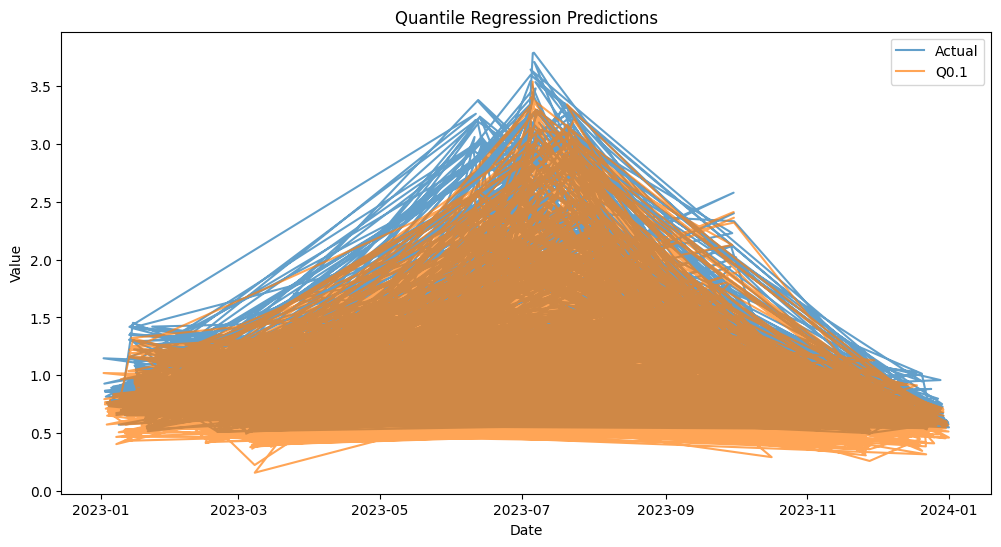

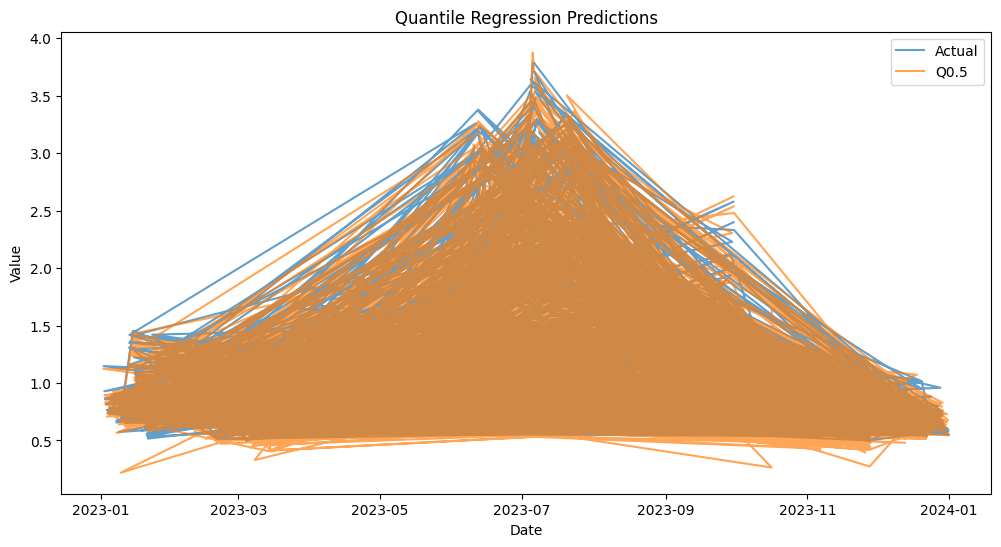

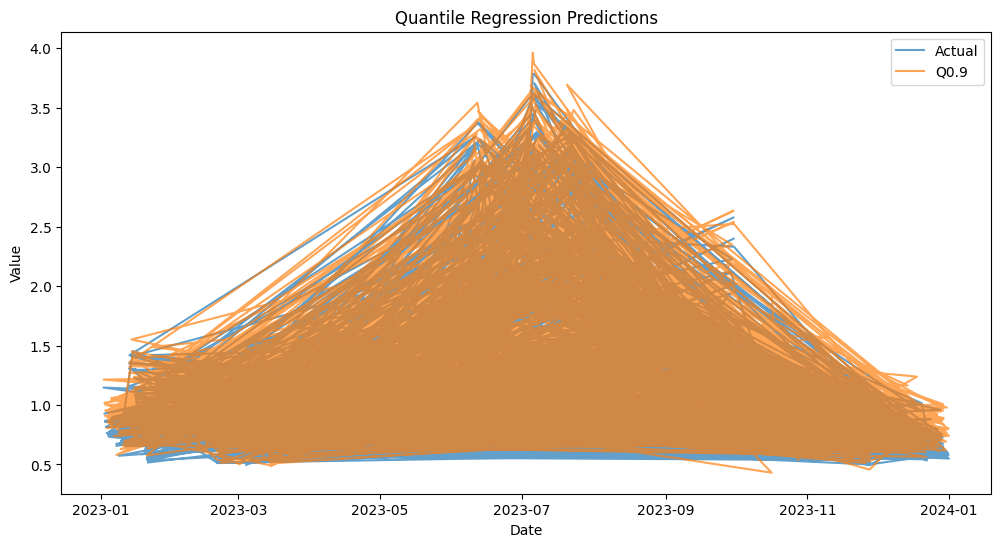

In [ ]:
# Plot the results

for q in quantiles:
    plt.figure(figsize=(12, 6))
    plt.plot(X_test.index, y_test, label='Actual', alpha=0.7)
    plt.plot(X_test.index, predictions[q], label=f'Q{q}', alpha=0.7)
    plt.legend()
    plt.title("Quantile Regression Predictions")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.show()

## **ARIMAX**

In [ ]:
# Let's read the data from 'Sheet1' and inspect the first few rows to understand its structure
df = pd.read_excel(xls, sheet_name='Sheet1')
df.head()

valid_time   SWH (m)   MWP (s)  MWD (degrees)  WMB (m)  \
0 2023-01-01 00:00:00  0.913489  6.199628     297.024841       78   
1 2023-01-01 01:00:00  0.926315  6.168501     299.492218       78   
2 2023-01-01 02:00:00  0.935679  6.160366     301.271240       78   
3 2023-01-01 03:00:00  0.941087  6.194872     301.798584       78   
4 2023-01-01 04:00:00  0.940675  6.262677     301.215576       78   

   Wave Length (m)  Wave Velocity (m/s)     SST (K)  Wind Speed (m/s)  \
0        60.009552             9.679541  301.426514          5.513513   
1        59.408478             9.630942  301.426514          5.414176   
2        59.251892             9.618242  301.426514          5.267598   
3        59.917515             9.672115  301.426514          4.961535   
4        61.236340             9.777981  301.426514          4.381107   

   Wind Direction (degrees)  Current Velocity (m/s)  Tide (m)  
0                285.310822                0.106924  0.705500  
1                280.778931                0.111127  0.565833  
2                276.447266                0.115497  0.314000  
3                273.530640                0.120191 -0.018833  
4                271.498596                0.123542 -0.376667

In [ ]:
df['valid_time'] = pd.to_datetime(df['valid_time'])
df.set_index('valid_time', inplace=True)

# Ensure the data is sorted by date
df = df.sort_index()

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

class WaveHeightARIMAX:
    def __init__(self):
        self.model = None
        self.scaler = StandardScaler()

    def prepare_data(self, df):
        """
        Prepare data for ARIMAX modeling
        """
        # Create a copy of the dataframe
        df = df.copy()

        # Ensure the index is datetime
        if not isinstance(df.index, pd.DatetimeIndex):
            raise ValueError("DataFrame index must be DatetimeIndex")

        # Create basic features
        df['hour'] = df.index.hour
        df['month'] = df.index.month
        df['dayofweek'] = df.index.dayofweek

        # Create cyclical features
        df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24)
        df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24)
        df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
        df['month_cos'] = np.cos(2 * np.pi * df['month']/12)

        # Create interaction features
        df['wind_wave_interaction'] = df['Wind Speed (m/s)'] * df['Wave Velocity (m/s)']
        df['temp_wave_interaction'] = df['SST (K)'] * df['Wave Velocity (m/s)']

        # Select features for ARIMAX
        exog_features = [
            'Wave Velocity (m/s)', 'Wind Speed (m/s)', 'Wind Direction (degrees)',
            'Current Velocity (m/s)', 'Tide (m)', 'SST (K)',
            'wind_wave_interaction', 'temp_wave_interaction',
            'hour_sin', 'hour_cos', 'month_sin', 'month_cos'
        ]

        # Scale the features
        X = self.scaler.fit_transform(df[exog_features])

        return pd.DataFrame(X, index=df.index, columns=exog_features)

    def find_optimal_order(self, y, max_p=3, max_d=2, max_q=3):
        """
        Find optimal ARIMA orders using AIC
        """
        best_aic = float('inf')
        best_order = None

        for p in range(max_p + 1):
            for d in range(max_d + 1):
                for q in range(max_q + 1):
                    try:
                        model = SARIMAX(y, order=(p, d, q))
                        results = model.fit()
                        aic = results.aic

                        if aic < best_aic:
                            best_aic = aic
                            best_order = (p, d, q)

                    except:
                        continue

        return best_order

    def check_stationarity(self, data):
        """
        Perform augmented Dickey-Fuller test
        """
        from statsmodels.tsa.stattools import adfuller

        result = adfuller(data)
        print('ADF Statistic:', result[0])
        print('p-value:', result[1])
        print('Critical values:')
        for key, value in result[4].items():
            print(f'\t{key}: {value}')

    def fit(self, df, target_col='SWH (m)', train_size=0.8):
        """
        Fit the ARIMAX model
        """
        # Prepare exogenous variables
        X = self.prepare_data(df)
        y = df[target_col]

        # Split data into train and test
        train_idx = int(len(df) * train_size)
        X_train = X.iloc[:train_idx]
        X_test = X.iloc[train_idx:]
        y_train = y.iloc[:train_idx]
        y_test = y.iloc[train_idx:]

        # Check stationarity
        print("Checking stationarity of target variable:")
        self.check_stationarity(y_train)

        # Find optimal order
        print("\nFinding optimal ARIMA order...")
        order = self.find_optimal_order(y_train)
        print(f"Optimal order: {order}")

        # Fit the model
        print("\nFitting ARIMAX model...")
        self.model = SARIMAX(y_train,
                            exog=X_train,
                            order=order)
        self.results = self.model.fit()

        # Make predictions
        train_pred = self.results.get_prediction(start=y_train.index[0], end=y_train.index[-1], exog=X_train) # Fix: Explicitly specify start and end for train prediction
        test_pred = self.results.get_prediction(start=y_test.index[0], end=y_test.index[-1], exog=X_test) # Fix: Explicitly specify start and end for test prediction


        # Calculate metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_pred.predicted_mean))
        test_rmse = np.sqrt(mean_squared_error(y_test, test_pred.predicted_mean))
        train_r2 = r2_score(y_train, train_pred.predicted_mean)
        test_r2 = r2_score(y_test, test_pred.predicted_mean)

        return {
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'y_train': y_train,
            'y_test': y_test,
            'train_pred': train_pred,
            'test_pred': test_pred,
            'model_summary': self.results.summary()
        }

    def plot_diagnostics(self):
        """
        Plot model diagnostics
        """
        self.results.plot_diagnostics(figsize=(15, 12))
        plt.tight_layout()
        plt.show()

    def plot_results(self, results):
        """
        Plot actual vs predicted values
        """
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

        # Training period
        ax1.plot(results['y_train'].index, results['y_train'],
                label='Actual', alpha=0.7)
        ax1.plot(results['y_train'].index,
                results['train_pred'].predicted_mean,
                label='Predicted', alpha=0.7)
        ax1.set_title('Training Period: Actual vs Predicted Wave Height')
        ax1.legend()

        # Test period
        ax2.plot(results['y_test'].index, results['y_test'],
                label='Actual', alpha=0.7)
        ax2.plot(results['y_test'].index,
                results['test_pred'].predicted_mean,
                label='Predicted', alpha=0.7)
        ax2.set_title('Test Period: Actual vs Predicted Wave Height')
        ax2.legend()

        plt.tight_layout()
        plt.show()

    def forecast(self, steps, exog_future):
        """
        Make future predictions
        """
        if self.model is None:
            raise ValueError("Model not fitted yet")

        # Scale the future exogenous variables
        exog_future_scaled = self.scaler.transform(exog_future)

        # Make predictions
        forecast = self.results.get_forecast(steps=steps, exog=exog_future_scaled)

        return {
            'mean': forecast.predicted_mean,
            'conf_int': forecast.conf_int()
        }

# Example usage:
'''
# Initialize and fit the model
model = WaveHeightARIMAX()
results = model.fit(df)

# Print metrics
print(f"\nTraining RMSE: {results['train_rmse']:.3f}")
print(f"Test RMSE: {results['test_rmse']:.3f}")
print(f"Training R²: {results['train_r2']:.3f}")
print(f"Test R²: {results['test_r2']:.3f}")

# Plot diagnostics and results
model.plot_diagnostics()
model.plot_results(results)

# Make future predictions (assuming you have future exogenous variables)
future_exog = prepare_future_data()  # You need to implement this
forecast = model.forecast(steps=24, exog_future=future_exog)
'''

'\n# Initialize and fit the model\nmodel = WaveHeightARIMAX()\nresults = model.fit(df)\n\n# Print metrics\nprint(f"\nTraining RMSE: {results[\'train_rmse\']:.3f}")\nprint(f"Test RMSE: {results[\'test_rmse\']:.3f}")\nprint(f"Training R²: {results[\'train_r2\']:.3f}")\nprint(f"Test R²: {results[\'test_r2\']:.3f}")\n\n# Plot diagnostics and results\nmodel.plot_diagnostics()\nmodel.plot_results(results)\n\n# Make future predictions (assuming you have future exogenous variables)\nfuture_exog = prepare_future_data()  # You need to implement this\nforecast = model.forecast(steps=24, exog_future=future_exog)\n'

In [ ]:
model = WaveHeightARIMAX()

In [ ]:
results = model.fit(df)

Checking stationarity of target variable:
ADF Statistic: -2.8915074296716194
p-value: 0.04634451824539908
Critical values:
	1%: -3.4312878793158
	5%: -2.861954467074997
	10%: -2.566990616877995

Finding optimal ARIMA order...
Optimal order: (3, 1, 3)

Fitting ARIMAX model...


In [ ]:
# Print metrics
print(f"\nTraining RMSE: {results['train_rmse']:.3f}")
print(f"Test RMSE: {results['test_rmse']:.3f}")
print(f"Training R²: {results['train_r2']:.3f}")
print(f"Test R²: {results['test_r2']:.3f}")


Training RMSE: 0.021
Test RMSE: 0.148
Training R²: 0.999
Test R²: -1.170


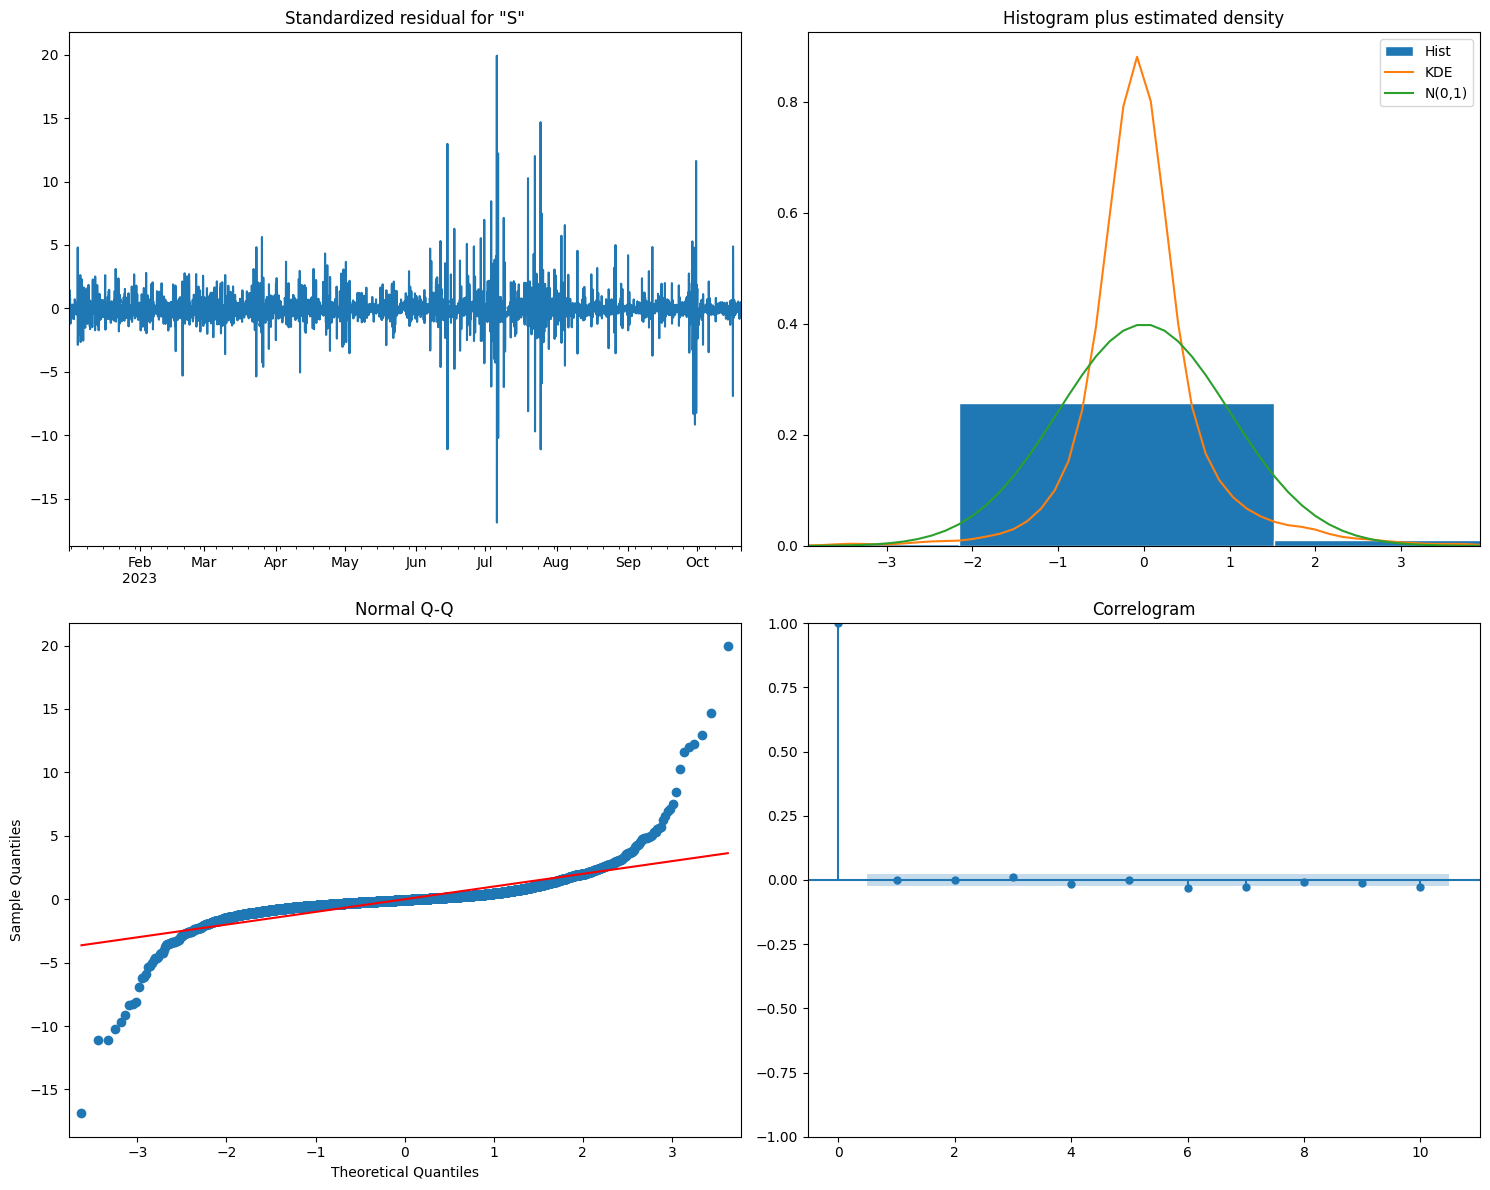

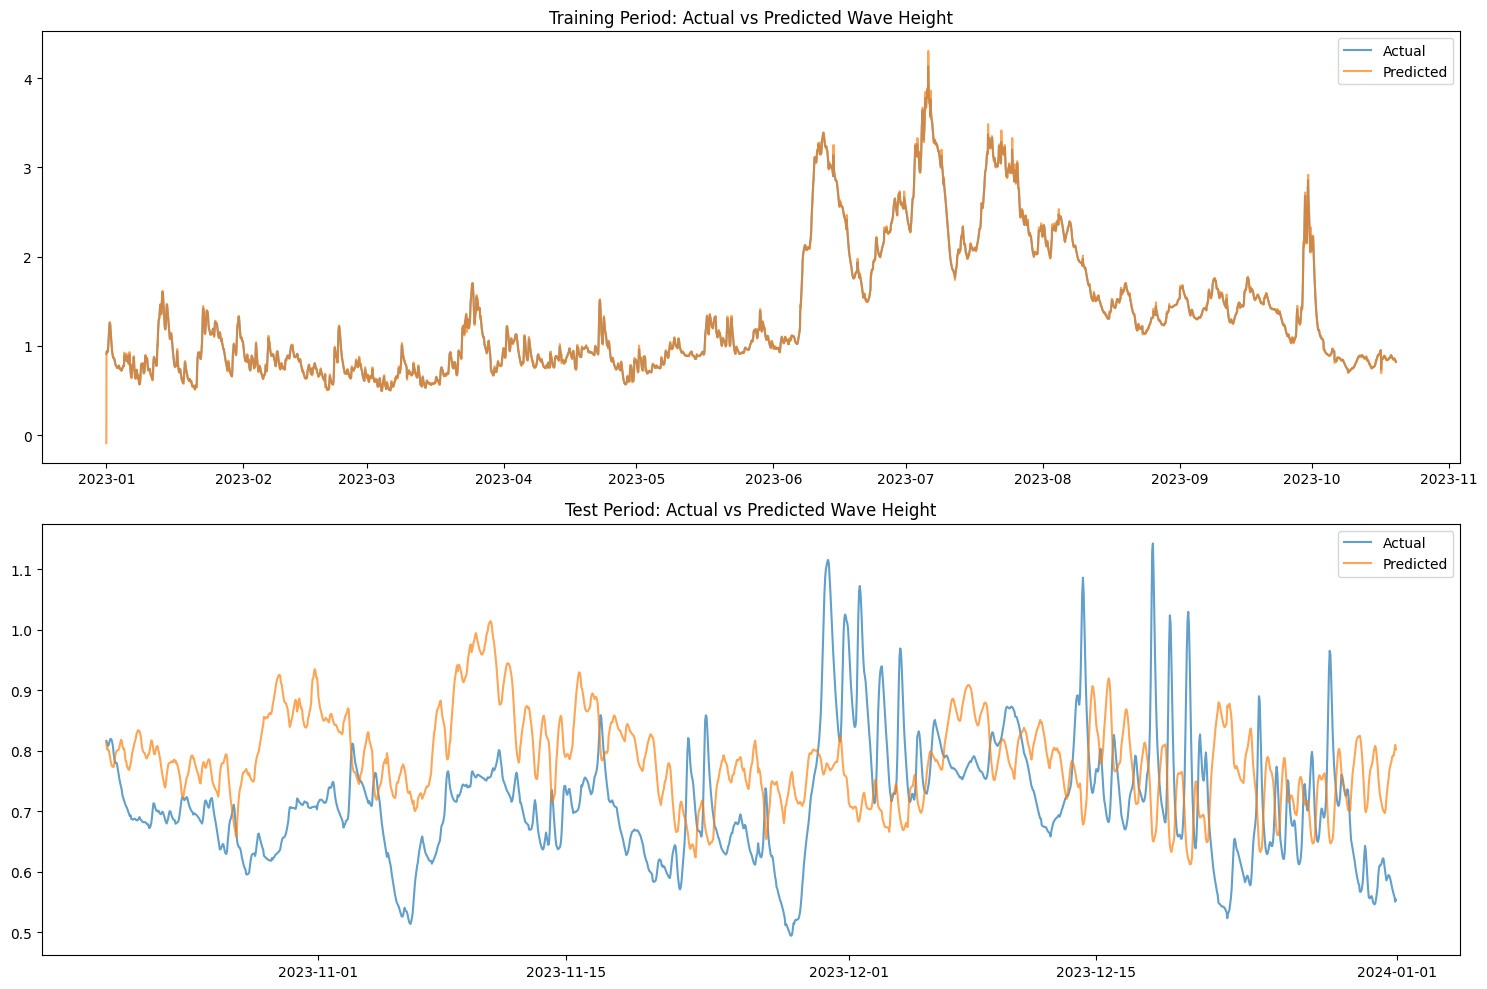

In [ ]:
# Plot diagnostics and results
model.plot_diagnostics()
model.plot_results(results)

# **MWP (Mean Wave Period)**

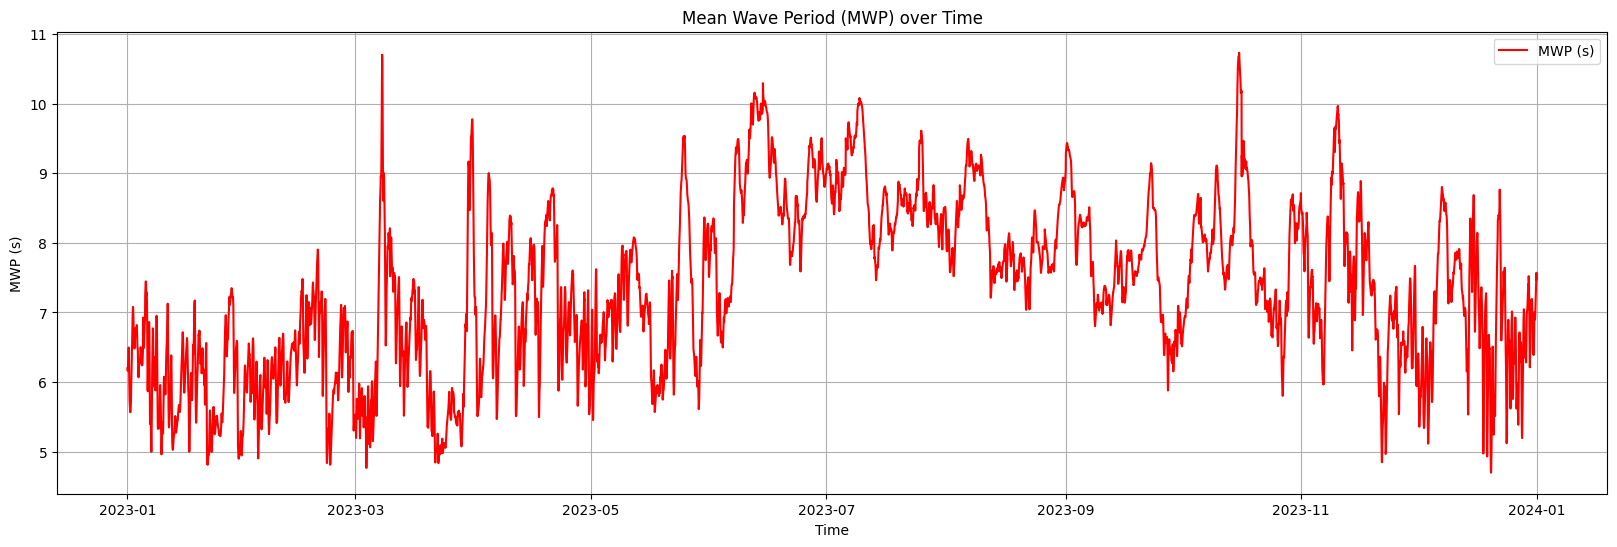

In [ ]:

# Plotting the Significant Wave Height (SWH) over time
plt.figure(figsize=(20,6))
plt.plot(df.index, df['MWP (s)'], label='MWP (s)', color='r')
plt.title('Mean Wave Period (MWP) over Time')
plt.xlabel('Time')
plt.ylabel('MWP (s)')
plt.grid(True)
plt.legend()
plt.show()

### **Decomposition Analysis**

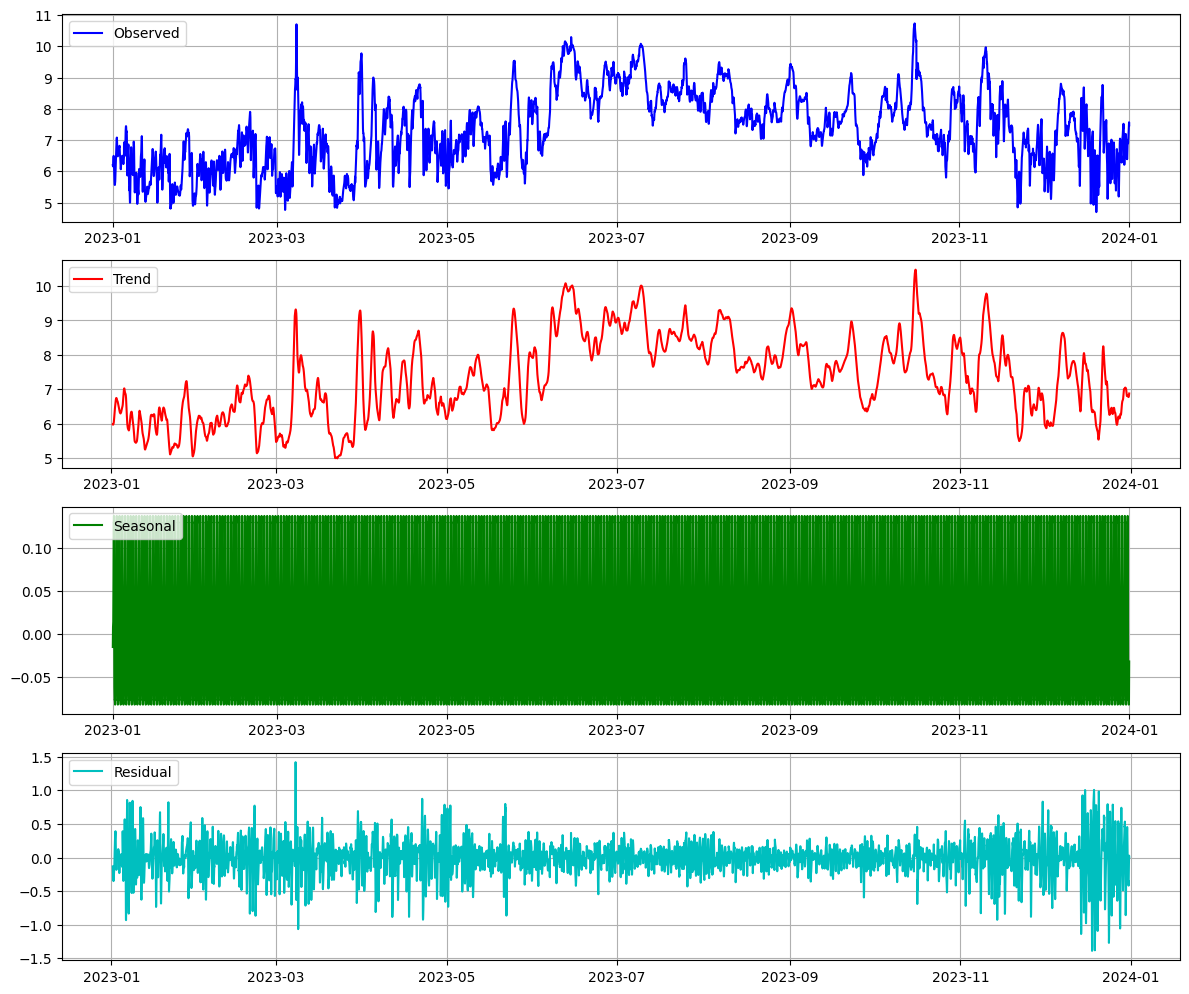

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series into trend, seasonal, and residual components
swh_series = df['MWP (s)']
decomposition = seasonal_decompose(swh_series, model='additive', period=24)  # Assuming daily seasonality

# Plot the decomposed components
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed', color='b')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='r')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='g')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='c')
plt.legend(loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()


### **ADF (Augmented Dickey-Fuller) Test**

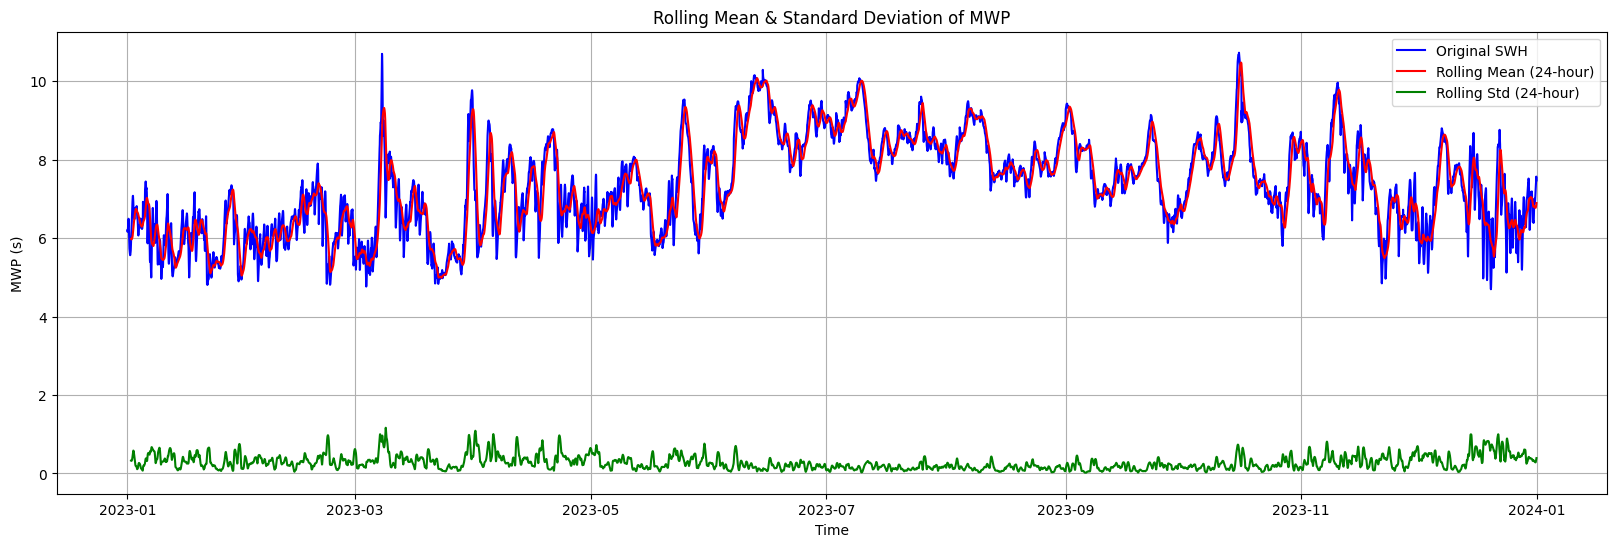

ADF Statistic: -5.529267
p-value: 0.000002
Critical Values:
   1%: -3.431099968539641
   5%: -2.86187143613454
   10%: -2.5669464184887825


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Step 1: Plot rolling statistics
window = 24  # Daily window
rolling_mean = df['MWP (s)'].rolling(window=window).mean()
rolling_std = df['MWP (s)'].rolling(window=window).std()

plt.figure(figsize=(20, 6))
plt.plot(df.index, df['MWP (s)'], label='Original SWH', color='b')
plt.plot(df.index, rolling_mean, label='Rolling Mean (24-hour)', color='r')
plt.plot(df.index, rolling_std, label='Rolling Std (24-hour)', color='g')
plt.title('Rolling Mean & Standard Deviation of MWP')
plt.xlabel('Time')
plt.ylabel('MWP (s)')
plt.legend()
plt.grid(True)
plt.show()

# Step 2: Perform the Augmented Dickey-Fuller test
adf_result = adfuller(df['MWP (s)'])
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

# Interpretation:
# If p-value < 0.05, we reject the null hypothesis and conclude the series is stationary.


### **Autocorrelation Analysis**

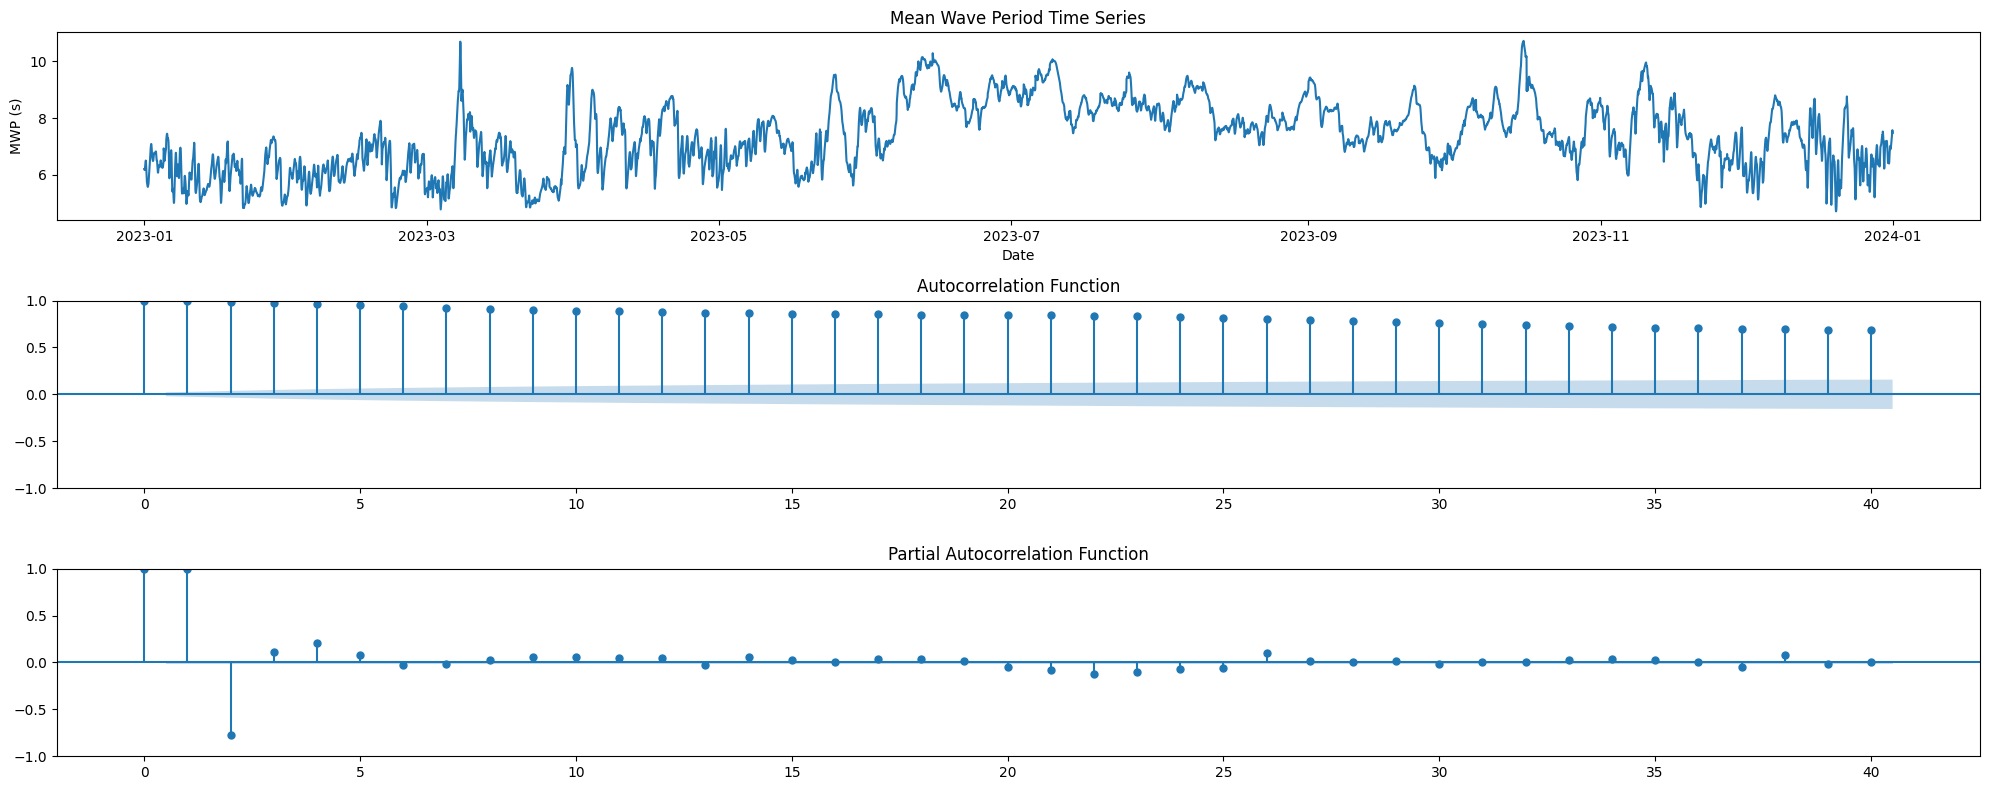

ACF values:
Lag 0: 1.0
Lag 1: 0.9968297088057319
Lag 2: 0.9888531258968752
Lag 3: 0.9774905994448717
Lag 4: 0.9643261323323237
Lag 5: 0.9506775062814561
Lag 6: 0.9373532857484292
Lag 7: 0.9247510027844906
Lag 8: 0.9130100595271294
Lag 9: 0.902185021733129
Lag 10: 0.8923314167845918
Lag 11: 0.883534739330842
Lag 12: 0.87590276047414
Lag 13: 0.8693515736544084
Lag 14: 0.8638375681972416
Lag 15: 0.8592246192587845
Lag 16: 0.8553180725920446
Lag 17: 0.851980641712588
Lag 18: 0.8491137327387137
Lag 19: 0.8466301662394029
Lag 20: 0.8443118382056722
Lag 21: 0.8417684291112413
Lag 22: 0.8383969077922664
Lag 23: 0.8335683215797951
Lag 24: 0.8267935661935696
Lag 25: 0.817821551196416
Lag 26: 0.8070260035175881
Lag 27: 0.7949901900499523
Lag 28: 0.7824188532929321
Lag 29: 0.7699524187589116
Lag 30: 0.7579824666766936
Lag 31: 0.7467139724051565
Lag 32: 0.7361976994395006
Lag 33: 0.7264851489472238
Lag 34: 0.7176630557036332
Lag 35: 0.7098540442532068
Lag 36: 0.7031390764996727
Lag 37: 0.6973715261

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Calculate ACF and PACF
lag_acf = acf(df['MWP (s)'], nlags=40)
lag_pacf = pacf(df['MWP (s)'], nlags=40, method='ols')

# Create the plots
plt.figure(figsize=(20, 8))

# Original Time Series
plt.subplot(311)
plt.plot(df.index, df['MWP (s)'])
plt.title('Mean Wave Period Time Series')
plt.xlabel('Date')
plt.ylabel('MWP (s)')

# ACF plot
plt.subplot(312)
plot_acf(df['MWP (s)'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Function')

# PACF plot
plt.subplot(313)
plot_pacf(df['MWP (s)'], lags=40, method='ols', ax=plt.gca())
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

# Print the ACF and PACF values
print("ACF values:")
for i, acf_value in enumerate(lag_acf):
    print(f"Lag {i}: {acf_value}")

print("\nPACF values:")
for i, pacf_value in enumerate(lag_pacf):
    print(f"Lag {i}: {pacf_value}")

# Identify significant lags
confidence_interval = 1.96 / np.sqrt(len(df))  # 95% confidence interval

print("\nSignificant ACF lags:")
for i, acf_value in enumerate(lag_acf):
    if abs(acf_value) > confidence_interval:
        print(f"Lag {i}: {acf_value}")

print("\nSignificant PACF lags:")
for i, pacf_value in enumerate(lag_pacf):
    if abs(pacf_value) > confidence_interval:
        print(f"Lag {i}: {pacf_value}")

## **Feature Extraction**

In [ ]:
def create_cyclical_features(df):
    """
    Create cyclical features from temporal variables.
    """
    # Hour of day
    df['hour_sin'] = np.sin(2 * np.pi * df.index.hour/24)
    df['hour_cos'] = np.cos(2 * np.pi * df.index.hour/24)

    # Day of week
    df['dayofweek_sin'] = np.sin(2 * np.pi * df.index.dayofweek/7)
    df['dayofweek_cos'] = np.cos(2 * np.pi * df.index.dayofweek/7)

    # Month of year
    df['month_sin'] = np.sin(2 * np.pi * df.index.month/12)
    df['month_cos'] = np.cos(2 * np.pi * df.index.month/12)

    # Day of year
    df['dayofyear_sin'] = np.sin(2 * np.pi * df.index.dayofyear/365.25)
    df['dayofyear_cos'] = np.cos(2 * np.pi * df.index.dayofyear/365.25)

    return df

def create_interaction_features(df):
    """
    Create interaction features between relevant variables.
    """
    # Wind-Wave interactions
    df['wind_wave_power'] = df['Wind Speed (m/s)'] ** 2 * df['Wave Velocity (m/s)']
    df['wind_wave_direction'] = df['Wind Speed (m/s)'] * np.cos(np.radians(df['MWD (degrees)']))

    # Temperature-Wave interactions
    df['temp_wave_interaction'] = df['SST (K)'] * df['Wave Velocity (m/s)']
    df['temp_wind_interaction'] = df['SST (K)'] * df['Wind Speed (m/s)']

    # Current-Wave interactions
    df['current_wave_interaction'] = df['Current Velocity (m/s)'] * df['Wave Velocity (m/s)']
    df['current_wind_interaction'] = df['Current Velocity (m/s)'] * df['Wind Speed (m/s)']

    # Tidal interactions
    df['tidal_wave_interaction'] = df['Tide (m)'] * df['Wave Velocity (m/s)']
    df['tidal_current_interaction'] = df['Tide (m)'] * df['Current Velocity (m/s)']

    # Complex interactions
    df['wave_energy_proxy'] = df['Wave Length (m)'] * df['Wave Velocity (m/s)'] ** 2

    return df

def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()

    # Add cyclical features
    df = create_cyclical_features(df)

    # Add interaction features
    df = create_interaction_features(df)

    # Original feature columns
    feature_columns = ['MWD (degrees)', 'Wave Length (m)', 'Wave Velocity (m/s)',
                      'SST (K)', 'Wind Speed (m/s)', 'Wind Direction (degrees)',
                      'Current Velocity (m/s)', 'Tide (m)']

    # Rolling features
    windows = [3, 6, 12, 24]  # Assuming hourly data

    for feature in feature_columns:
        for window in windows:
            # Rolling mean
            df[f'{feature}_rolling_mean_{window}'] = df[feature].rolling(
                window=window, min_periods=1).mean()

            # Rolling std
            df[f'{feature}_rolling_std_{window}'] = df[feature].rolling(
                window=window, min_periods=1).std()

            # Rolling max
            df[f'{feature}_rolling_max_{window}'] = df[feature].rolling(
                window=window, min_periods=1).max()

            # Rolling min
            df[f'{feature}_rolling_min_{window}'] = df[feature].rolling(
                window=window, min_periods=1).min()

            # Rolling skew
            df[f'{feature}_rolling_skew_{window}'] = df[feature].rolling(
                window=window, min_periods=1).skew()

    # Lag features
    lags = [1, 2, 3, 6, 12, 24]

    for feature in feature_columns:
        for lag in lags:
            df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)

    # Difference features at multiple levels
    for feature in feature_columns:
        df[f'{feature}_diff_1'] = df[feature].diff()
        df[f'{feature}_diff_2'] = df[feature].diff(2)
        df[f'{feature}_pct_change'] = df[feature].pct_change()

    # Rate of change features
    for feature in feature_columns:
        df[f'{feature}_roc_1'] = df[feature].diff() / df[feature].shift(1)
        df[f'{feature}_roc_12'] = (df[feature] - df[feature].shift(12)) / df[feature].shift(12)

    return df

In [ ]:
df_final = create_features(df)

<ipython-input-12-d52003ce6721>:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feature}_rolling_std_{window}'] = df[feature].rolling(
<ipython-input-12-d52003ce6721>:79: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feature}_rolling_max_{window}'] = df[feature].rolling(
<ipython-input-12-d52003ce6721>:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inst

In [ ]:
df_final

SWH (m)   MWP (s)  MWD (degrees)  WMB (m)  \
valid_time                                                        
2023-01-01 00:00:00  0.913489  6.199628     297.024841       78   
2023-01-01 01:00:00  0.926315  6.168501     299.492218       78   
2023-01-01 02:00:00  0.935679  6.160366     301.271240       78   
2023-01-01 03:00:00  0.941087  6.194872     301.798584       78   
2023-01-01 04:00:00  0.940675  6.262677     301.215576       78   
...                       ...       ...            ...      ...   
2023-12-31 19:00:00  0.566590  7.333844     226.846298       78   
2023-12-31 20:00:00  0.562095  7.398284     225.093842       78   
2023-12-31 21:00:00  0.558154  7.449719     223.485779       78   
2023-12-31 22:00:00  0.550133  7.569637     222.507385       78   
2023-12-31 23:00:00  0.553665  7.473798     221.024857       78   

                     Wave Length (m)  Wave Velocity (m/s)     SST (K)  \
valid_time                                                              
2023-01-01 00:00:00        60.009552             9.679541  301.426514   
2023-01-01 01:00:00        59.408478             9.630942  301.426514   
2023-01-01 02:00:00        59.251892             9.618242  301.426514   
2023-01-01 03:00:00        59.917515             9.672115  301.426514   
2023-01-01 04:00:00        61.236340             9.777981  301.426514   
...                              ...                  ...         ...   
2023-12-31 19:00:00        83.975487            11.450405  302.437012   
2023-12-31 20:00:00        85.457680            11.551014  302.437012   
2023-12-31 21:00:00        86.650085            11.631322  302.437012   
2023-12-31 22:00:00        89.462143            11.818551  302.398682   
2023-12-31 23:00:00        87.211121            11.668917  302.398682   

                     Wind Speed (m/s)  Wind Direction (degrees)  \
valid_time                                                        
2023-01-01 00:00:00          5.513513                285.310822   
2023-01-01 01:00:00          5.414176                280.778931   
2023-01-01 02:00:00          5.267598                276.447266   
2023-01-01 03:00:00          4.961535                273.530640   
2023-01-01 04:00:00          4.381107                271.498596   
...                               ...                       ...   
2023-12-31 19:00:00          0.766792                 84.546371   
2023-12-31 20:00:00          0.137918                216.836945   
2023-12-31 21:00:00          0.970841                256.796143   
2023-12-31 22:00:00          1.524606                233.677170   
2023-12-31 23:00:00          2.385033                240.690826   

                     Current Velocity (m/s)  ...  SST (K)_roc_1  \
valid_time                                   ...                  
2023-01-01 00:00:00                0.106924  ...            NaN   
2023-01-01 01:00:00                0.111127  ...       0.000000   
2023-01-01 02:00:00                0.115497  ...       0.000000   
2023-01-01 03:00:00                0.120191  ...       0.000000   
2023-01-01 04:00:00                0.123542  ...       0.000000   
...                                     ...  ...            ...   
2023-12-31 19:00:00                0.193851  ...       0.000000   
2023-12-31 20:00:00                0.181400  ...       0.000000   
2023-12-31 21:00:00                0.170041  ...       0.000000   
2023-12-31 22:00:00                0.160019  ...      -0.000127   
2023-12-31 23:00:00                0.151467  ...       0.000000   

                     SST (K)_roc_12  Wind Speed (m/s)_roc_1  \
valid_time                                                    
2023-01-01 00:00:00             NaN                     NaN   
2023-01-01 01:00:00             NaN               -0.018017   
2023-01-01 02:00:00             NaN               -0.027073   
2023-01-01 03:00:00             NaN               -0.058103   
2023-01-01 04:00:00             NaN               -0.116986   
...            

In [ ]:
df_final = df_final.drop(columns = ['SWH (m)'])

## **Random Forest**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Drop NaN values created by rolling calculations
df_final = df_final.dropna()

# Separate features and target
X = df_final.drop('MWP (s)', axis=1)
y = df_final['MWP (s)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_model = RandomForestRegressor(
    n_estimators=200,  # Increased number of trees
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
# Make predictions
train_predictions = rf_model.predict(X_train)
test_predictions = rf_model.predict(X_test)

# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

Train RMSE: 0.0012606374555222959
Test RMSE: 0.00505074725226178
Train R^2: 0.9999988974831533
Test R^2: 0.9999822645432688


In [ ]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance)

                            feature    importance
3               Wave Velocity (m/s)  3.550153e-01
25                wave_energy_proxy  3.316734e-01
2                   Wave Length (m)  3.130029e-01
19            temp_wave_interaction  1.709744e-04
113  Wind Speed (m/s)_rolling_max_6  6.276794e-05
..                              ...           ...
92            SST (K)_rolling_std_6  3.101087e-09
87            SST (K)_rolling_std_3  1.352556e-09
245              SST (K)_pct_change  2.456155e-10
243                  SST (K)_diff_1  1.388002e-10
1                           WMB (m)  0.000000e+00

[274 rows x 2 columns]


## **XGBoost**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Drop NaN values created by rolling calculations
df_final = df_final.dropna()

# Separate features and target
X = df_final.drop('MWP (s)', axis=1)
y = df_final['MWP (s)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100
}


In [ ]:
# Train the model
model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtrain, 'train'), (dtest, 'test')], early_stopping_rounds=10, verbose_eval=10)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:47:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:1.08143	test-rmse:1.08026
[10]	train-rmse:0.38062	test-rmse:0.37938
[20]	train-rmse:0.13434	test-rmse:0.13359
[30]	train-rmse:0.04786	test-rmse:0.04743
[40]	train-rmse:0.01792	test-rmse:0.01877
[50]	train-rmse:0.00813	test-rmse:0.01107
[60]	train-rmse:0.00542	test-rmse:0.00991
[70]	train-rmse:0.00464	test-rmse:0.00984
[80]	train-rmse:0.00428	test-rmse:0.00978
[90]	train-rmse:0.00403	test-rmse:0.00978
[95]	train-rmse:0.00393	test-rmse:0.00979


In [ ]:
# Make predictions
y_pred = model.predict(dtest)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.6f}")
print(f"R-squared Score: {r2:.6f}")

Root Mean Squared Error: 0.009793
R-squared Score: 0.999933


In [ ]:
# Feature importance
feature_importance = model.get_score(importance_type='weight')
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_importance:
    print(f"Feature {feature}: {importance}")

Feature Wave Length (m): 1068.0
Feature temp_wave_interaction: 541.0
Feature Wave Length (m)_rolling_min_3: 129.0
Feature Wave Length (m)_lag_1: 76.0
Feature MWD (degrees): 70.0
Feature Wave Length (m)_rolling_max_3: 62.0
Feature Wave Length (m)_diff_2: 49.0
Feature Wind Speed (m/s)_rolling_skew_3: 45.0
Feature MWD (degrees)_rolling_skew_3: 42.0
Feature SST (K)_lag_24: 38.0
Feature Wind Speed (m/s)_roc_12: 37.0
Feature MWD (degrees)_rolling_skew_6: 36.0
Feature Wave Length (m)_rolling_skew_6: 35.0
Feature Tide (m): 34.0
Feature Wave Length (m)_rolling_min_6: 34.0
Feature Wave Length (m)_rolling_mean_3: 33.0
Feature Current Velocity (m/s)_rolling_std_6: 32.0
Feature Current Velocity (m/s)_rolling_skew_3: 31.0
Feature Wind Speed (m/s): 30.0
Feature Wave Length (m)_rolling_skew_3: 30.0
Feature Wind Direction (degrees)_rolling_skew_3: 30.0
Feature Tide (m)_pct_change: 29.0
Feature MWD (degrees)_rolling_std_3: 28.0
Feature Wind Speed (m/s)_rolling_std_3: 28.0
Feature Wind Speed (m/s)_rollin

## **LGBM**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler

# Drop NaN values created by rolling calculations
df_final = df_final.dropna()

# Separate features and target
X = df_final.drop('MWP (s)', axis=1)
y = df_final['MWP (s)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the LGBM model
model = LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=7,
    num_leaves=31,
    random_state=42
)

In [ ]:
model.fit(X_train_scaled, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67166
[LightGBM] [Info] Number of data points in the train set: 6988, number of used features: 273
[LightGBM] [Info] Start training from score 7.357809
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

LGBMRegressor(max_depth=7, random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Root Mean Squared Error: 0.010079964375452475
R-squared Score: 0.999929360258864


In [ ]:
features = [col for col in X.columns]

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                          feature  importance
2                 Wave Length (m)         689
19          temp_wave_interaction         277
3             Wave Velocity (m/s)         166
192         Wave Length (m)_lag_1          66
25              wave_energy_proxy          65
..                            ...         ...
236      MWD (degrees)_pct_change           0
31   MWD (degrees)_rolling_mean_6           0
210        Wind Speed (m/s)_lag_1           0
244                SST (K)_diff_2           0
204                 SST (K)_lag_1           0

[274 rows x 2 columns]


## **Quantile Regression**

In [ ]:
from statsmodels.regression.quantile_regression import QuantReg
from statsmodels.tsa.tsatools import add_trend
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
# Drop NaN values created by rolling calculations
df_final = df_final.dropna()

# Separate features and target
X = df_final.drop('MWP (s)', axis=1)
y = df_final['MWP (s)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit quantile regression models for different quantiles
quantiles = [0.1, 0.5, 0.9]
models = {}

for q in quantiles:
    model = QuantReg(y_train, X_train)
    results = model.fit(q=q)
    models[q] = results


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


In [ ]:
predictions = {}
for q, model in models.items():
    predictions[q] = model.predict(X_test)

# Calculate accuracy metrics for the median (q=0.5) predictions
median_predictions = predictions[0.5]

mae = mean_absolute_error(y_test, median_predictions)
rmse = np.sqrt(mean_squared_error(y_test, median_predictions))
r2 = r2_score(y_test, median_predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")



Mean Absolute Error (MAE): 9.786181235573748e-05
Root Mean Squared Error (RMSE): 0.0002736488905123023
R-squared (R²) Score: 0.9999999479382828


In [ ]:
# Calculate custom accuracy metric
threshold = 0.1  # 10% threshold
within_threshold = np.abs(y_test - median_predictions) <= threshold * np.abs(y_test)
accuracy = np.mean(within_threshold)
print(f"Custom Accuracy (within 10% threshold): {accuracy:%}")


Custom Accuracy (within 10% threshold): 100.000000%


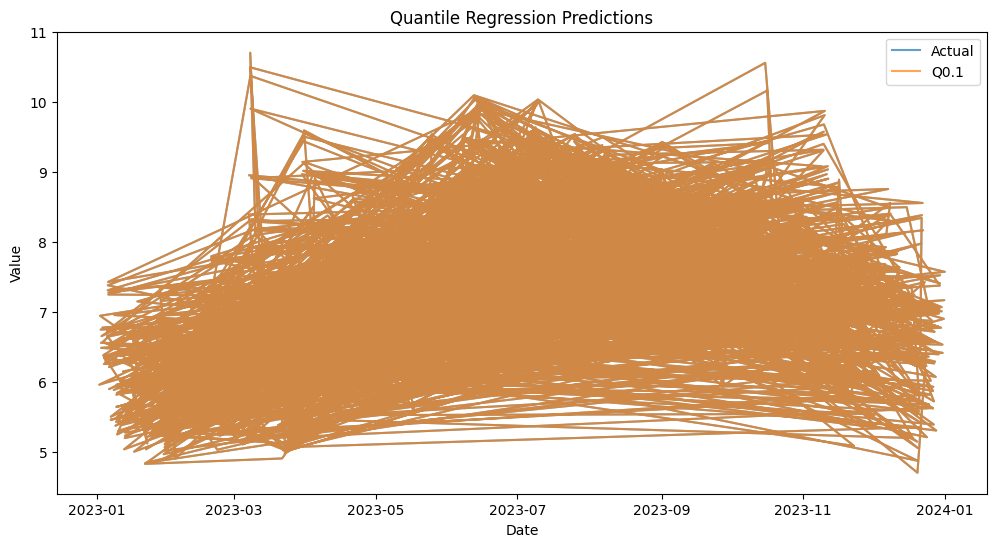

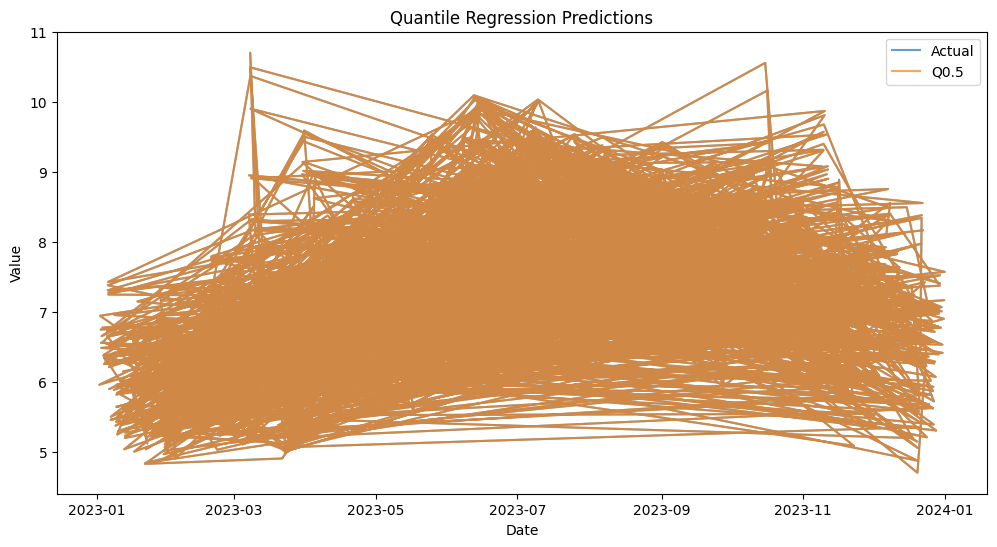

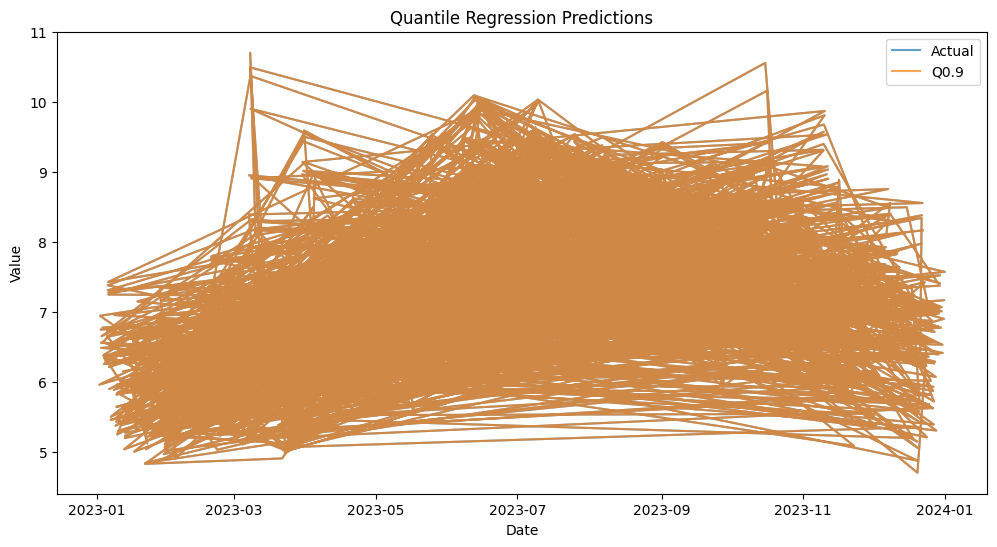

In [ ]:
# Plot the results

for q in quantiles:
    plt.figure(figsize=(12, 6))
    plt.plot(X_test.index, y_test, label='Actual', alpha=0.7)
    plt.plot(X_test.index, predictions[q], label=f'Q{q}', alpha=0.7)
    plt.legend()
    plt.title("Quantile Regression Predictions")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.show()

## **Cat Boost**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler

# Drop NaN values created by rolling calculations
df_final = df_final.dropna()

# Separate features and target
X = df_final.drop('MWP (s)', axis=1)
y = df_final['MWP (s)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the CatBoost model
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=3,
    loss_function='RMSE',
    verbose=100
)

In [ ]:
model.fit(X_train_scaled, y_train, eval_set=(X_test_scaled, y_test), early_stopping_rounds=50)

0:	learn: 1.1449534	test: 1.1436122	best: 1.1436122 (0)	total: 240ms	remaining: 3m 59s
100:	learn: 0.0387690	test: 0.0456023	best: 0.0456023 (100)	total: 16.2s	remaining: 2m 23s
200:	learn: 0.0262111	test: 0.0328400	best: 0.0328400 (200)	total: 31.1s	remaining: 2m 3s
300:	learn: 0.0221816	test: 0.0295529	best: 0.0295529 (300)	total: 38.9s	remaining: 1m 30s
400:	learn: 0.0197755	test: 0.0280558	best: 0.0280558 (400)	total: 47.1s	remaining: 1m 10s
500:	learn: 0.0178323	test: 0.0270447	best: 0.0270447 (500)	total: 53.3s	remaining: 53.1s
600:	learn: 0.0162012	test: 0.0262362	best: 0.0262362 (600)	total: 1m 8s	remaining: 45.2s
700:	learn: 0.0149484	test: 0.0256850	best: 0.0256850 (700)	total: 1m 22s	remaining: 35.4s
800:	learn: 0.0138622	test: 0.0252911	best: 0.0252872 (797)	total: 1m 34s	remaining: 23.5s
900:	learn: 0.0128535	test: 0.0249192	best: 0.0249192 (900)	total: 1m 40s	remaining: 11.1s
999:	learn: 0.0119532	test: 0.0246387	best: 0.0246348 (998)	total: 1m 49s	remaining: 0us

bestTes

In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Root Mean Squared Error: 0.02463484988532066
R-squared Score: 0.9995780791911497


In [ ]:
features = [col for col in X.columns]

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                               feature  importance
3                  Wave Velocity (m/s)   11.304420
198          Wave Velocity (m/s)_lag_1   10.215817
25                   wave_energy_proxy    9.899036
69   Wave Velocity (m/s)_rolling_min_3    8.027574
46      Wave Length (m)_rolling_mean_3    6.693752
..                                 ...         ...
205                      SST (K)_lag_2    0.000000
90              SST (K)_rolling_skew_3    0.000000
264                      SST (K)_roc_1    0.000000
100            SST (K)_rolling_skew_12    0.000000
86              SST (K)_rolling_mean_3    0.000000

[274 rows x 2 columns]


## **ARIMAX**

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

class WaveHeightARIMAX:
    def __init__(self):
        self.model = None
        self.scaler = StandardScaler()

    def prepare_data(self, df):
        """
        Prepare data for ARIMAX modeling
        """
        # Create a copy of the dataframe
        df = df.copy()

        # Ensure the index is datetime
        if not isinstance(df.index, pd.DatetimeIndex):
            raise ValueError("DataFrame index must be DatetimeIndex")

        # Create basic features
        df['hour'] = df.index.hour
        df['month'] = df.index.month
        df['dayofweek'] = df.index.dayofweek

        # Create cyclical features
        df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24)
        df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24)
        df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
        df['month_cos'] = np.cos(2 * np.pi * df['month']/12)

        # Create interaction features
        df['wind_wave_interaction'] = df['Wind Speed (m/s)'] * df['Wave Velocity (m/s)']
        df['temp_wave_interaction'] = df['SST (K)'] * df['Wave Velocity (m/s)']

        # Select features for ARIMAX
        exog_features = [
            'Wave Velocity (m/s)', 'Wind Speed (m/s)', 'Wind Direction (degrees)',
            'Current Velocity (m/s)', 'Tide (m)', 'SST (K)',
            'wind_wave_interaction', 'temp_wave_interaction',
            'hour_sin', 'hour_cos', 'month_sin', 'month_cos'
        ]

        # Scale the features
        X = self.scaler.fit_transform(df[exog_features])

        return pd.DataFrame(X, index=df.index, columns=exog_features)

    def find_optimal_order(self, y, max_p=3, max_d=2, max_q=3):
        """
        Find optimal ARIMA orders using AIC
        """
        best_aic = float('inf')
        best_order = None

        for p in range(max_p + 1):
            for d in range(max_d + 1):
                for q in range(max_q + 1):
                    try:
                        model = SARIMAX(y, order=(p, d, q))
                        results = model.fit()
                        aic = results.aic

                        if aic < best_aic:
                            best_aic = aic
                            best_order = (p, d, q)

                    except:
                        continue

        return best_order

    def check_stationarity(self, data):
        """
        Perform augmented Dickey-Fuller test
        """
        from statsmodels.tsa.stattools import adfuller

        result = adfuller(data)
        print('ADF Statistic:', result[0])
        print('p-value:', result[1])
        print('Critical values:')
        for key, value in result[4].items():
            print(f'\t{key}: {value}')

    def fit(self, df, target_col='MWP (s)', train_size=0.8):
        """
        Fit the ARIMAX model
        """
        # Prepare exogenous variables
        X = self.prepare_data(df)
        y = df[target_col]

        # Split data into train and test
        train_idx = int(len(df) * train_size)
        X_train = X.iloc[:train_idx]
        X_test = X.iloc[train_idx:]
        y_train = y.iloc[:train_idx]
        y_test = y.iloc[train_idx:]

        # Check stationarity
        print("Checking stationarity of target variable:")
        self.check_stationarity(y_train)

        # Find optimal order
        print("\nFinding optimal ARIMA order...")
        order = self.find_optimal_order(y_train)
        print(f"Optimal order: {order}")

        # Fit the model
        print("\nFitting ARIMAX model...")
        self.model = SARIMAX(y_train,
                            exog=X_train,
                            order=order)
        self.results = self.model.fit()

        # Make predictions
        train_pred = self.results.get_prediction(start=y_train.index[0], end=y_train.index[-1], exog=X_train) # Fix: Explicitly specify start and end for train prediction
        test_pred = self.results.get_prediction(start=y_test.index[0], end=y_test.index[-1], exog=X_test) # Fix: Explicitly specify start and end for test prediction


        # Calculate metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, train_pred.predicted_mean))
        test_rmse = np.sqrt(mean_squared_error(y_test, test_pred.predicted_mean))
        train_r2 = r2_score(y_train, train_pred.predicted_mean)
        test_r2 = r2_score(y_test, test_pred.predicted_mean)

        return {
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'y_train': y_train,
            'y_test': y_test,
            'train_pred': train_pred,
            'test_pred': test_pred,
            'model_summary': self.results.summary()
        }

    def plot_diagnostics(self):
        """
        Plot model diagnostics
        """
        self.results.plot_diagnostics(figsize=(15, 12))
        plt.tight_layout()
        plt.show()

    def plot_results(self, results):
        """
        Plot actual vs predicted values
        """
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

        # Training period
        ax1.plot(results['y_train'].index, results['y_train'],
                label='Actual', alpha=0.7)
        ax1.plot(results['y_train'].index,
                results['train_pred'].predicted_mean,
                label='Predicted', alpha=0.7)
        ax1.set_title('Training Period: Actual vs Predicted Wave Period')
        ax1.legend()

        # Test period
        ax2.plot(results['y_test'].index, results['y_test'],
                label='Actual', alpha=0.7)
        ax2.plot(results['y_test'].index,
                results['test_pred'].predicted_mean,
                label='Predicted', alpha=0.7)
        ax2.set_title('Test Period: Actual vs Predicted Wave Period')
        ax2.legend()

        plt.tight_layout()
        plt.show()

    def forecast(self, steps, exog_future):
        """
        Make future predictions
        """
        if self.model is None:
            raise ValueError("Model not fitted yet")

        # Scale the future exogenous variables
        exog_future_scaled = self.scaler.transform(exog_future)

        # Make predictions
        forecast = self.results.get_forecast(steps=steps, exog=exog_future_scaled)

        return {
            'mean': forecast.predicted_mean,
            'conf_int': forecast.conf_int()
        }

# Example usage:
'''
# Initialize and fit the model
model = WaveHeightARIMAX()
results = model.fit(df)

# Print metrics
print(f"\nTraining RMSE: {results['train_rmse']:.3f}")
print(f"Test RMSE: {results['test_rmse']:.3f}")
print(f"Training R²: {results['train_r2']:.3f}")
print(f"Test R²: {results['test_r2']:.3f}")

# Plot diagnostics and results
model.plot_diagnostics()
model.plot_results(results)

# Make future predictions (assuming you have future exogenous variables)
future_exog = prepare_future_data()  # You need to implement this
forecast = model.forecast(steps=24, exog_future=future_exog)
'''

'\n# Initialize and fit the model\nmodel = WaveHeightARIMAX()\nresults = model.fit(df)\n\n# Print metrics\nprint(f"\nTraining RMSE: {results[\'train_rmse\']:.3f}")\nprint(f"Test RMSE: {results[\'test_rmse\']:.3f}")\nprint(f"Training R²: {results[\'train_r2\']:.3f}")\nprint(f"Test R²: {results[\'test_r2\']:.3f}")\n\n# Plot diagnostics and results\nmodel.plot_diagnostics()\nmodel.plot_results(results)\n\n# Make future predictions (assuming you have future exogenous variables)\nfuture_exog = prepare_future_data()  # You need to implement this\nforecast = model.forecast(steps=24, exog_future=future_exog)\n'

In [ ]:
model = WaveHeightARIMAX()

In [ ]:
results = model.fit(df)

Checking stationarity of target variable:
ADF Statistic: -4.764381606446079
p-value: 6.35926649661257e-05
Critical values:
	1%: -3.431288283027058
	5%: -2.861954645454677
	10%: -2.5669907118326596

Finding optimal ARIMA order...
Optimal order: (3, 1, 3)

Fitting ARIMAX model...


In [ ]:
# Print metrics
print(f"\nTraining RMSE: {results['train_rmse']}")
print(f"Test RMSE: {results['test_rmse']}")
print(f"Training R²: {results['train_r2']}")
print(f"Test R²: {results['test_r2']}")


Training RMSE: 0.0879053649153734
Test RMSE: 8.99555679553208e-07
Training R²: 0.9950487779850785
Test R²: 0.999999999999129


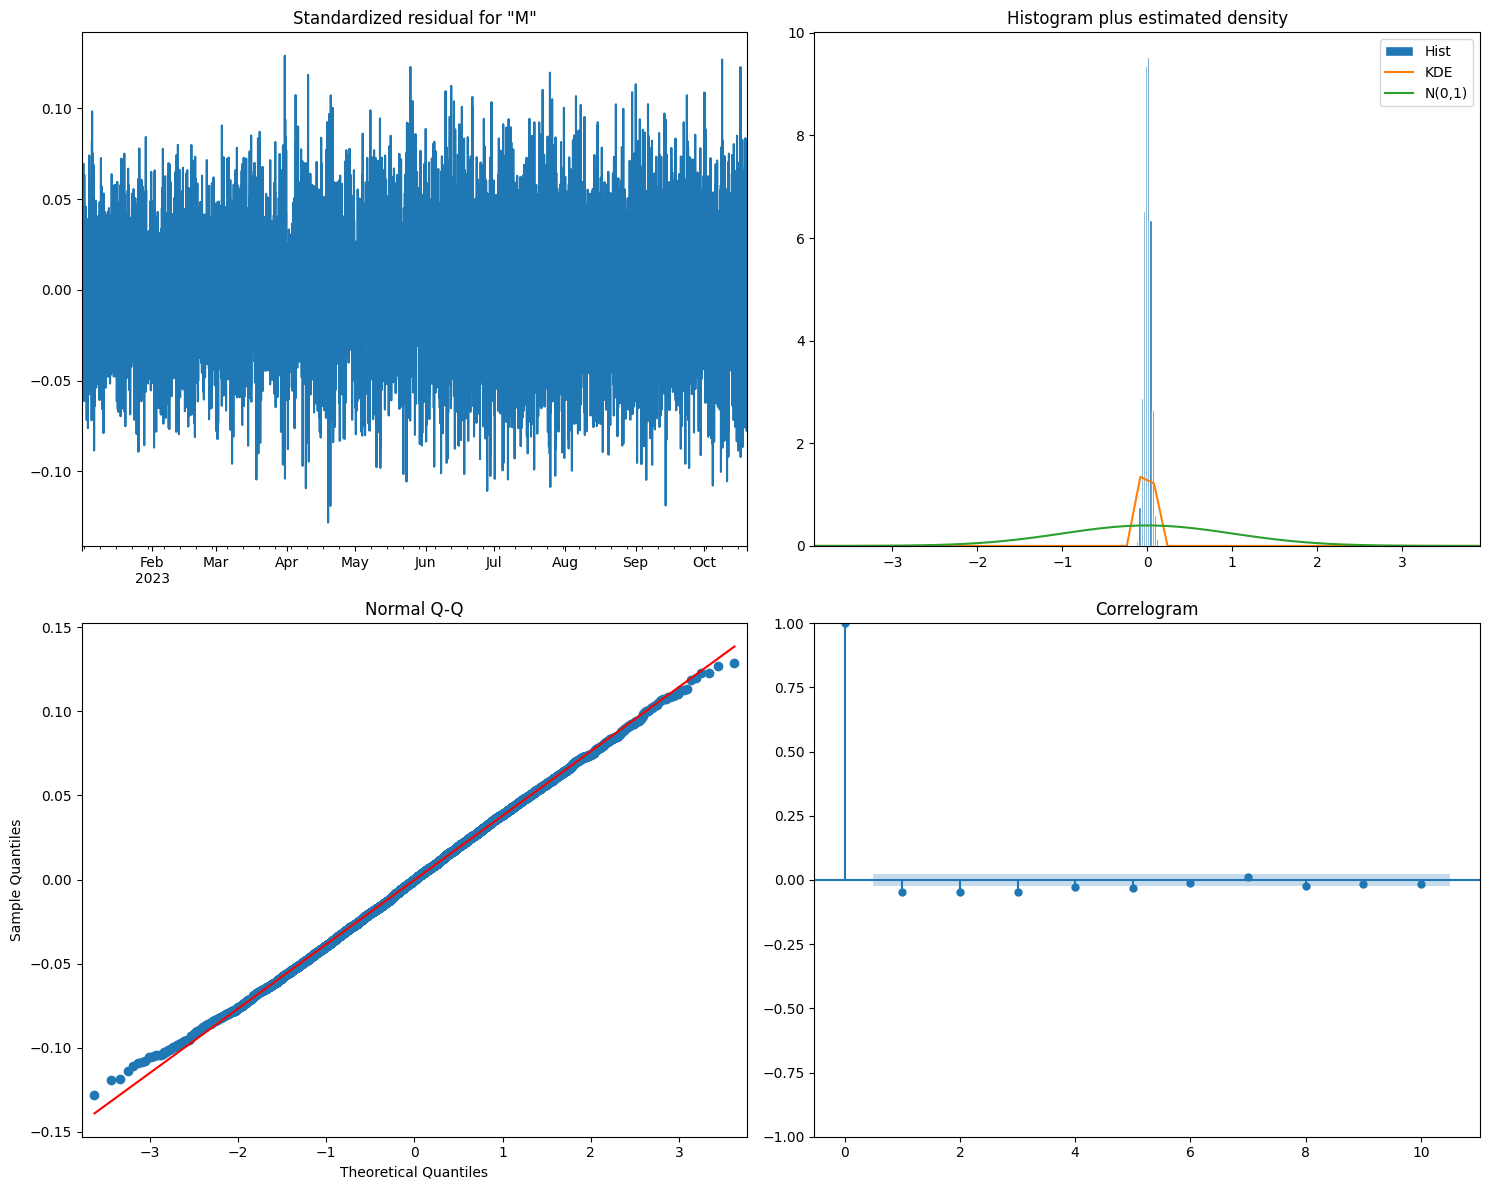

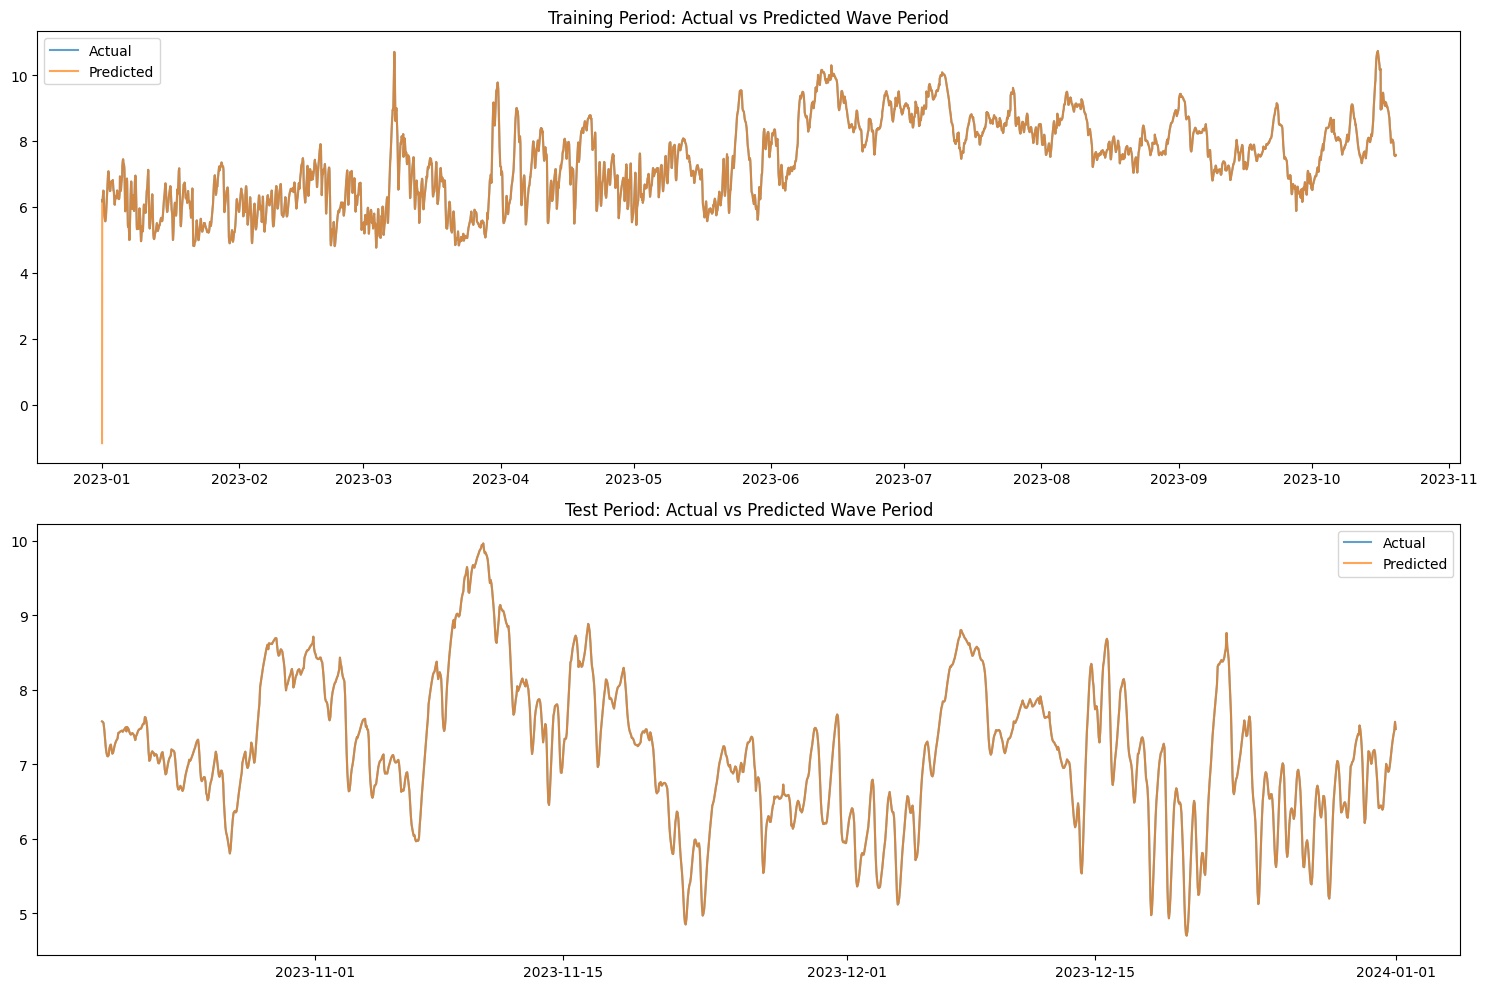

In [ ]:
# Plot diagnostics and results
model.plot_diagnostics()
model.plot_results(results)